In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr, chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/Bank Loan Case Study/Uncleaned Datasets/merged_data_uncleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 63 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  float64
 1   SK_ID_CURR                   1413701 non-null  float64
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT_x                 1413701 non-null  float64
 5   NAME_CASH_LOAN_PURPOSE       1413701 non-null  object 
 6   NAME_CONTRACT_STATUS         1413701 non-null  object 
 7   DAYS_DECISION                1413701 non-null  float64
 8   NAME_PAYMENT_TYPE            1413701 non-null  object 
 9   CODE_REJECT_REASON           1413701 non-null  object 
 10  NAME_CLIENT_TYPE             1413701 non-null  object 
 11  NAME_GOODS_CATEGORY          1413701 non-null  object 
 12  NAME_PORTFOLIO               1413701 non-n

In [4]:
df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_APPLICATION  AMT_CREDIT_x  \
0   2030495.0    271877.0       Consumer loans          17145.0       17145.0   
1   2802425.0    108129.0           Cash loans         607500.0      679671.0   
2   2523466.0    122040.0           Cash loans         112500.0      136444.5   
3   2819243.0    176158.0           Cash loans         450000.0      470790.0   
4   1784265.0    202054.0           Cash loans         337500.0      404055.0   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                    XAP             Approved           73.0   
1                    XNA             Approved          164.0   
2                    XNA             Approved          301.0   
3                    XNA             Approved          512.0   
4                Repairs              Refused          781.0   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank                XAP         Repeater   
1                    XNA                XAP         Repeater   
2  Cash through the bank                XAP         Repeater   
3  Cash through the bank                XAP         Repeater   
4  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide              35.0         Connectivity   
1           Contact center               1.0                  XNA   
2  Credit and cash offices               1.0                  XNA   
3  Credit and cash offices               1.0                  XNA   
4  Credit and cash offices               1.0                  XNA   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  TARGET NAME_CONTRACT_TYPE_y  \
0           middle  POS mobile with interest     0.0           Cash loans   
1       low_action          Cash X-Sell: low     0.0      Revolving loans   
2             high         Cash X-Sell: high     0.0           Cash loans   
3           middle       Cash X-Sell: middle     0.0           Cash loans   
4             high         Cash Street: high     0.0           Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           F            N               Y           1.0          225000.0   
1           F            N               N           0.0           90000.0   
2           F            N               Y           3.0           40500.0   
3           M            Y               Y           0.0          315000.0   
4           F            N               N           1.0          180000.0   

   AMT_CREDIT_y  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
0      533668.5      25803.0         477000.0    Unaccompanied   
1      135000.0       6750.0         135000.0           Family   
2      284400.0      16456.5         225000.0  Spouse, partner   
3     1687266.0      64395.0        1575000.0           Family   
4      628069.5      34200.0         499500.0    Unaccompanied   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0         State servant              Incomplete higher            Married   
1  Commercial associate  Secondary / secondary special     Civil marriage   
2               Working  Secondary / secondary special            Married   
3             Pensioner  Secondary / secondary special            Married   
4         State servant  Secondary / secondary special            Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.046220     14443.0         7392.0   
1  House / apartment            

In [7]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

OBS_30_CNT_SOCIAL_CIRCLE
0.000000      732938
1.000000      221099
2.000000      138230
3.000000       96310
4.000000       68036
5.000000       47132
6.000000       32976
7.000000       23019
8.000000       15296
9.000000       11101
10.000000       7568
11.000000       4779
12.000000       4011
1.422245        3146
13.000000       2448
14.000000       1555
15.000000       1093
16.000000        838
17.000000        644
19.000000        335
18.000000        297
20.000000        205
21.000000        173
22.000000        163
24.000000         80
25.000000         76
23.000000         57
27.000000         40
29.000000         19
26.000000         15
30.000000         13
47.000000          4
348.000000         3
28.000000          2
Name: count, dtype: int64

In [5]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.000000     1238905
1.000000      137077
2.000000       26062
3.000000        6489
0.143421        3146
4.000000        1658
5.000000         289
6.000000          66
7.000000           4
34.000000          3
8.000000           2
Name: count, dtype: int64

In [6]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
0.000000     1283920
1.000000      106413
2.000000       15937
3.000000        3236
0.100049        3146
4.000000         919
5.000000         109
6.000000          14
7.000000           4
24.000000          3
Name: count, dtype: int64

In [4]:
df.drop(columns=["SK_ID_PREV"], inplace=True)

In [5]:
#Renaming the columns as convention
df = df.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE',
                'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_CREDIT_y':'AMT_CREDIT_PREV',
                'AMT_ANNUITY_y':'AMT_ANNUITY_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'}, 
               axis = 1)

In [6]:
#according to column description ->1 implies defaulter, 0 implies repayer
df["TARGET"] = df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

In [7]:
numeric_columns = []

# Loop through the columns and check data types
for col in df.columns:
    if df[col].dtype == 'float64':
        numeric_columns.append(col)
        
print("Columns with float64 data type:")
print(numeric_columns)

Columns with float64 data type:
['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_PREV', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [8]:
object_columns = []

# Loop through the columns and check data types
for col in df.columns:
    if df[col].dtype == 'object':
        object_columns.append(col)
        
print("Columns with float64 data type:")
print(object_columns)

Columns with float64 data type:
['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'TARGET', 'NAME_CONTRACT_TYPE_PREV', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [9]:
unique_values = {}

for column in numeric_columns:
    unique_values[column] = df[column].nunique()

In [10]:
# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values for {column}: {values}")

Unique values for SK_ID_CURR: 291057
Unique values for AMT_APPLICATION: 86766
Unique values for AMT_CREDIT: 81731
Unique values for DAYS_DECISION: 2922
Unique values for SELLERPLACE_AREA: 2076
Unique values for CNT_CHILDREN: 15
Unique values for AMT_INCOME_TOTAL: 1876
Unique values for AMT_CREDIT_PREV: 5496
Unique values for AMT_ANNUITY: 13372
Unique values for AMT_GOODS_PRICE: 987
Unique values for REGION_POPULATION_RELATIVE: 81
Unique values for DAYS_BIRTH: 17448
Unique values for DAYS_EMPLOYED: 12451
Unique values for DAYS_REGISTRATION: 15607
Unique values for DAYS_ID_PUBLISH: 6161
Unique values for CNT_FAM_MEMBERS: 17
Unique values for REGION_RATING_CLIENT: 3
Unique values for REGION_RATING_CLIENT_W_CITY: 3
Unique values for HOUR_APPR_PROCESS_START: 24
Unique values for REG_REGION_NOT_LIVE_REGION: 2
Unique values for REG_REGION_NOT_WORK_REGION: 2
Unique values for LIVE_REGION_NOT_WORK_REGION: 2
Unique values for REG_CITY_NOT_LIVE_CITY: 2
Unique values for REG_CITY_NOT_WORK_CITY: 2


UNIVARIATE ANALYSIS

1) FOR NUMERICAL COLUMNS

In [11]:
def univariate_analysis_numerical(dataframe, numerical_columns):
    
    for column in numerical_columns:
        
        print(f'Numerical Variable:{column}')
        print(f"Mean: {df[column].mean():.2f}")
        print(f"Median: {df[column].median():.2f}")
        print(f"Mode: {df[column].mode().values}")
        print(f"Standard Deviation: {df[column].std():.2f}")
        print(f"Variance: {df[column].var():.2f}")
        print(f"Skewness: {df[column].skew():.2f}")
            
       
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[column], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[column], color='orange')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

Numerical Variable:AMT_APPLICATION
Mean: 175243.59
Median: 70870.50
Mode: [0.]
Standard Deviation: 293622.19
Variance: 86213992305.01
Skewness: 3.40


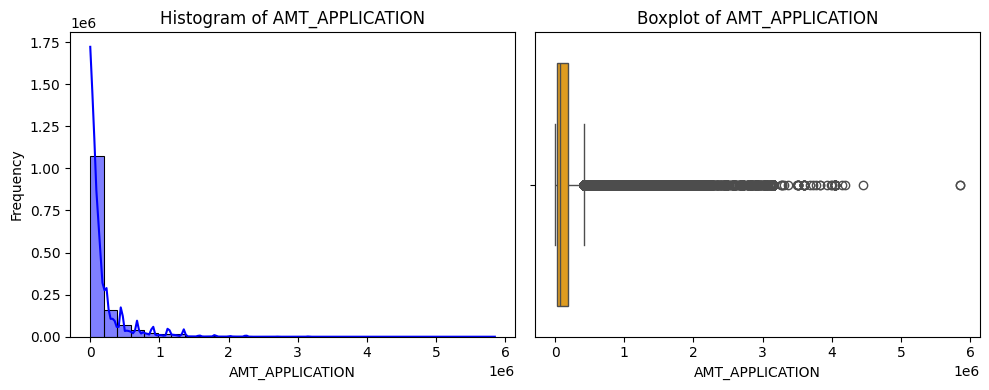

Numerical Variable:AMT_CREDIT
Mean: 196354.09
Median: 80595.00
Mode: [0.]
Standard Deviation: 319481.14
Variance: 102068197359.54
Skewness: 3.26


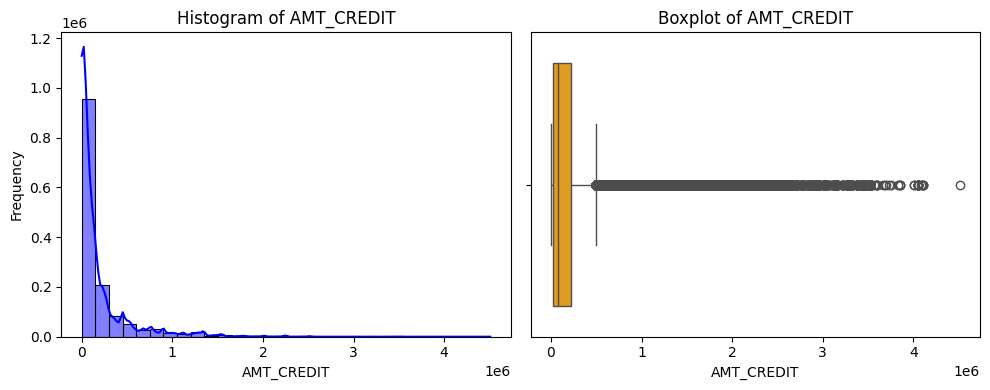

Numerical Variable:DAYS_DECISION
Mean: 880.37
Median: 582.00
Mode: [245.]
Standard Deviation: 783.54
Variance: 613935.20
Skewness: 1.03


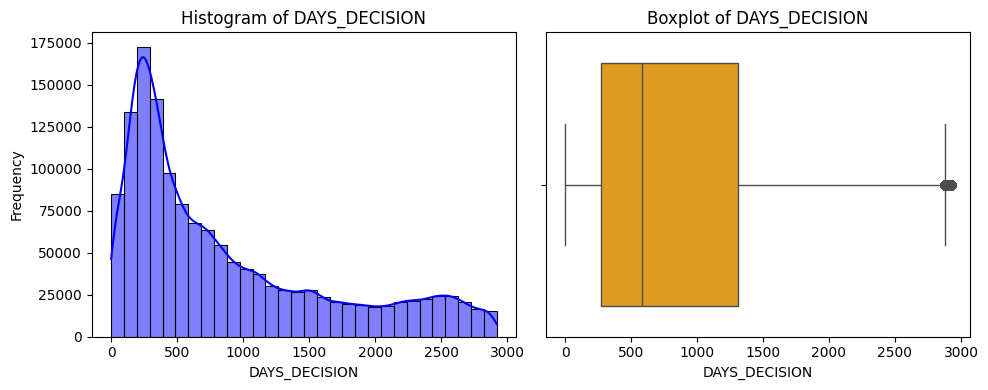

Numerical Variable:SELLERPLACE_AREA
Mean: 315.89
Median: 4.00
Mode: [1.]
Standard Deviation: 7695.04
Variance: 59213713.66
Skewness: 497.03


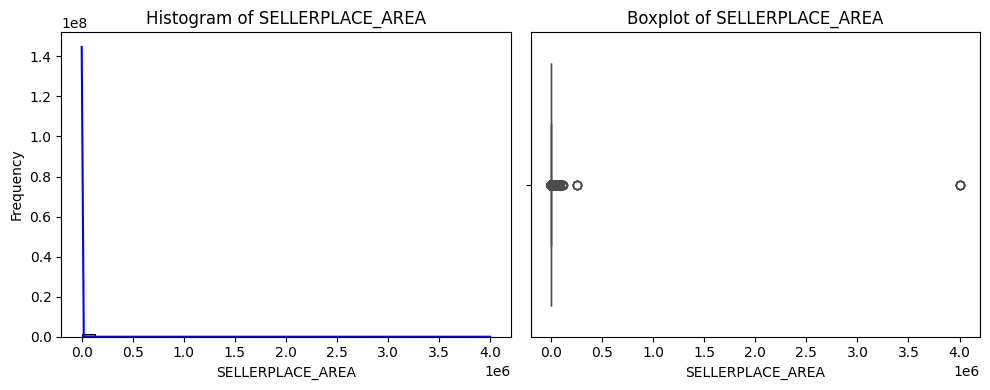

Numerical Variable:CNT_CHILDREN
Mean: 0.40
Median: 0.00
Mode: [0.]
Standard Deviation: 0.72
Variance: 0.51
Skewness: 1.98


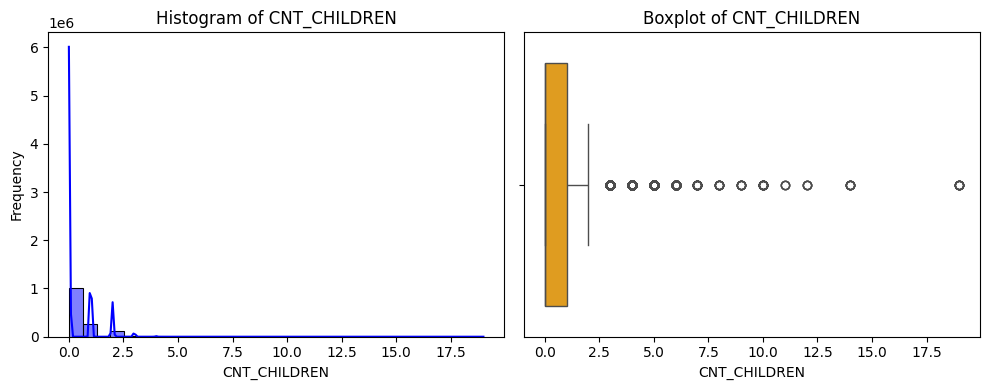

Numerical Variable:AMT_INCOME_TOTAL
Mean: 173316.04
Median: 157500.00
Mode: [135000.]
Standard Deviation: 198573.37
Variance: 39431384073.52
Skewness: 435.80


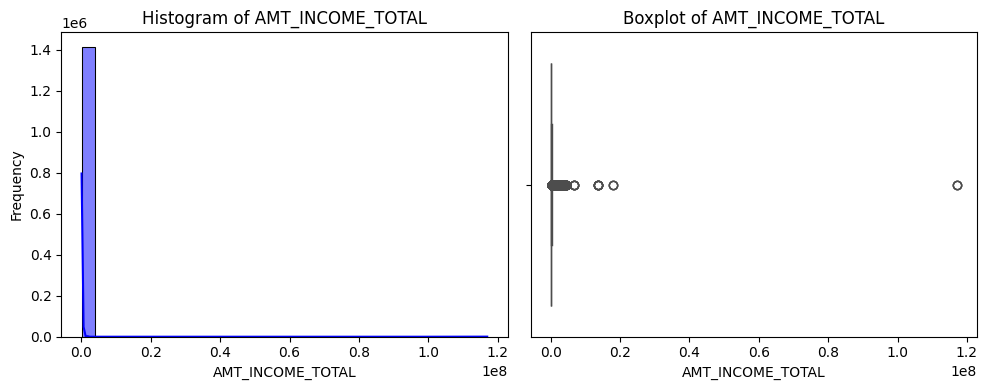

Numerical Variable:AMT_CREDIT_PREV
Mean: 587553.67
Median: 508495.50
Mode: [450000.]
Standard Deviation: 384917.33
Variance: 148161352000.67
Skewness: 1.12


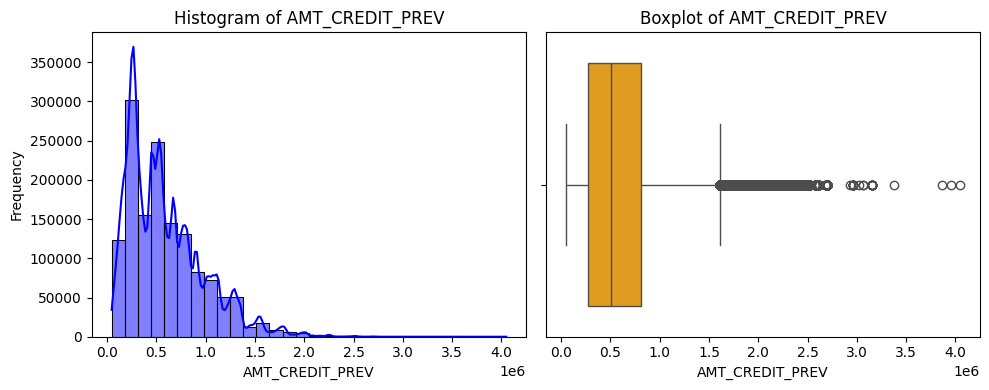

Numerical Variable:AMT_ANNUITY
Mean: 27017.02
Median: 24930.00
Mode: [13500.]
Standard Deviation: 13950.71
Variance: 194622195.87
Skewness: 1.30


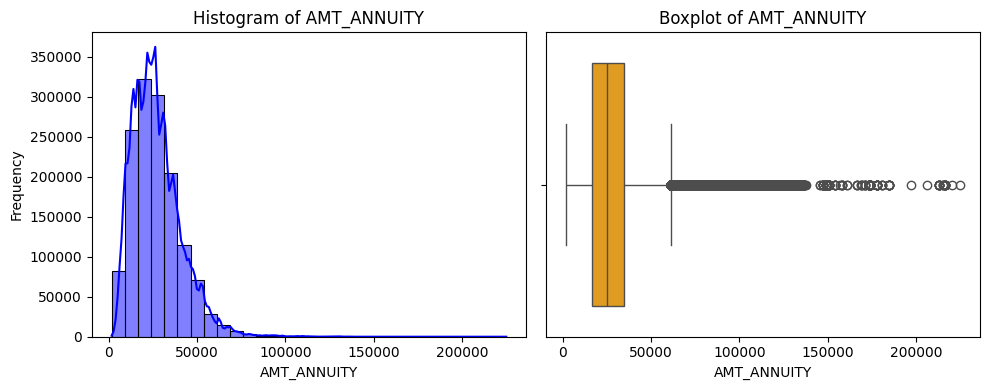

Numerical Variable:AMT_GOODS_PRICE
Mean: 527727.72
Median: 450000.00
Mode: [225000.]
Standard Deviation: 353095.67
Variance: 124676554792.25
Skewness: 1.22


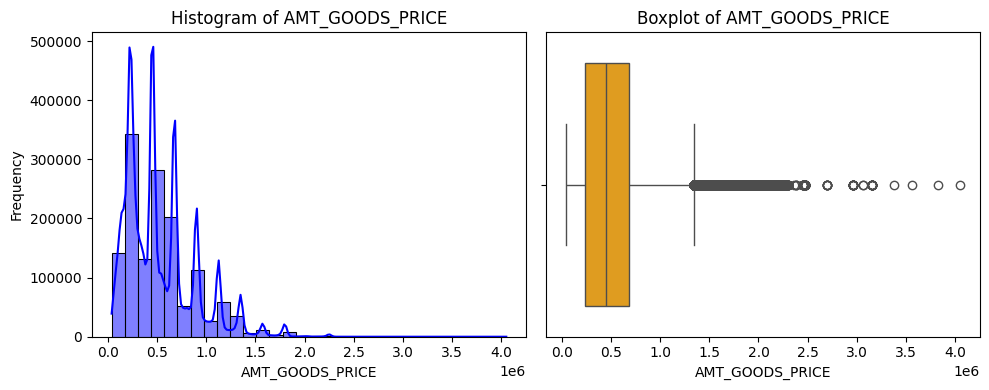

Numerical Variable:REGION_POPULATION_RELATIVE
Mean: 0.02
Median: 0.02
Mode: [0.035792]
Standard Deviation: 0.01
Variance: 0.00
Skewness: 1.47


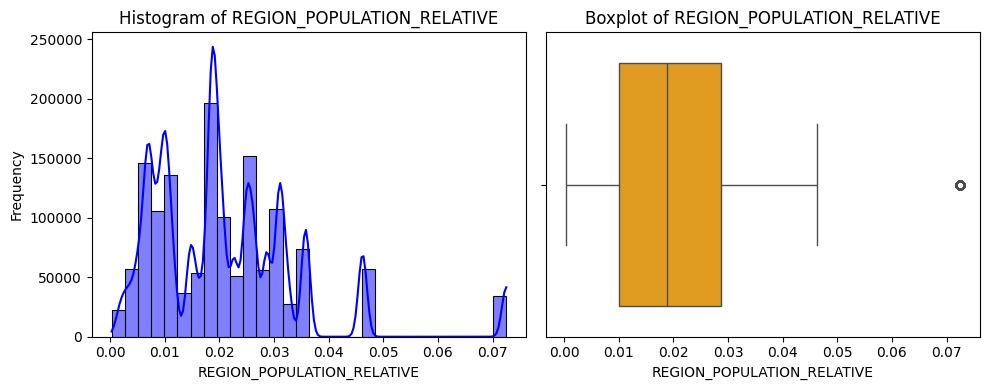

Numerical Variable:DAYS_BIRTH
Mean: 16321.05
Median: 16044.00
Mode: [14890.]
Standard Deviation: 4344.56
Variance: 18875176.30
Skewness: 0.09


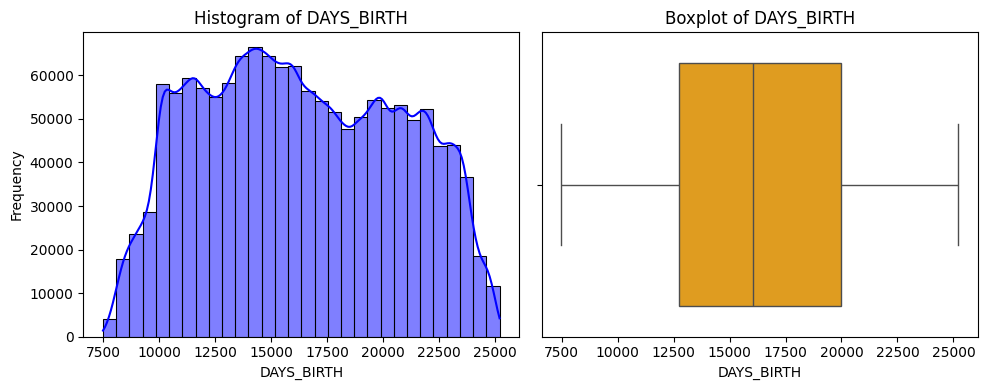

Numerical Variable:DAYS_EMPLOYED
Mean: 72663.47
Median: 2401.00
Mode: [365243.]
Standard Deviation: 143337.36
Variance: 20545599055.99
Skewness: 1.55


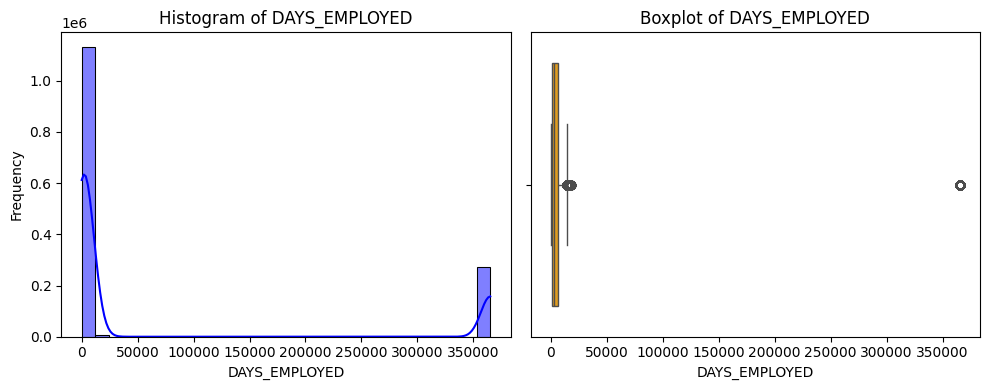

Numerical Variable:DAYS_REGISTRATION
Mean: 5003.23
Median: 4508.00
Mode: [1.]
Standard Deviation: 3551.05
Variance: 12609962.58
Skewness: 0.60


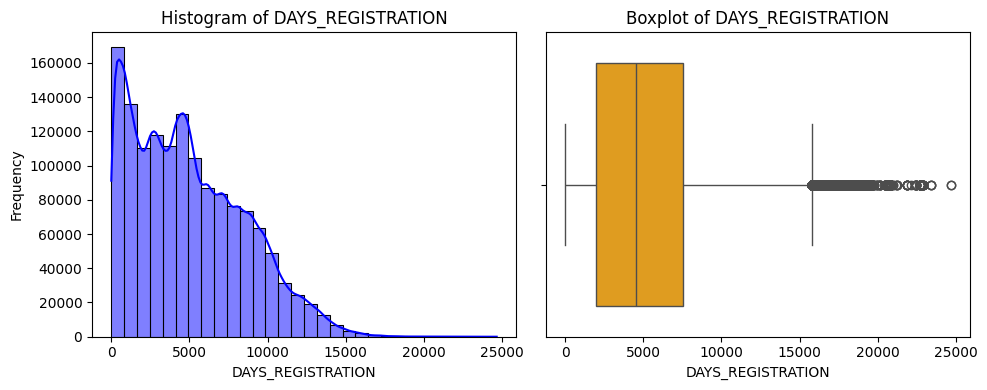

Numerical Variable:DAYS_ID_PUBLISH
Mean: 3034.56
Median: 3330.00
Mode: [4053.]
Standard Deviation: 1507.38
Variance: 2272183.54
Skewness: -0.39


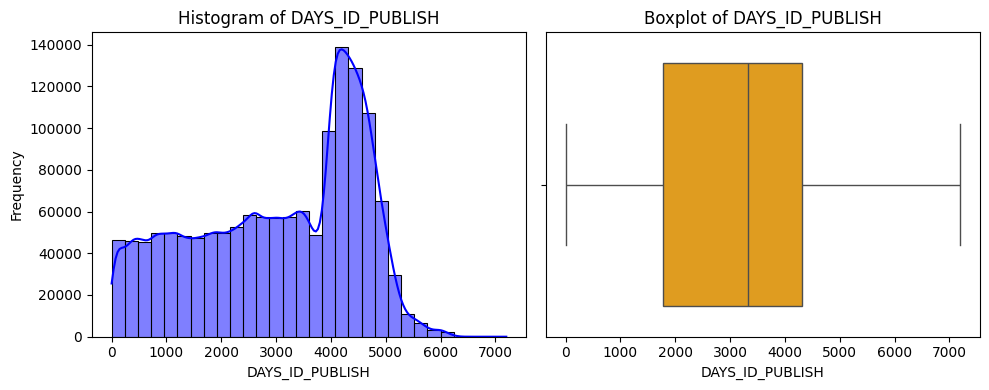

Numerical Variable:CNT_FAM_MEMBERS
Mean: 2.15
Median: 2.00
Mode: [2.]
Standard Deviation: 0.90
Variance: 0.81
Skewness: 1.00


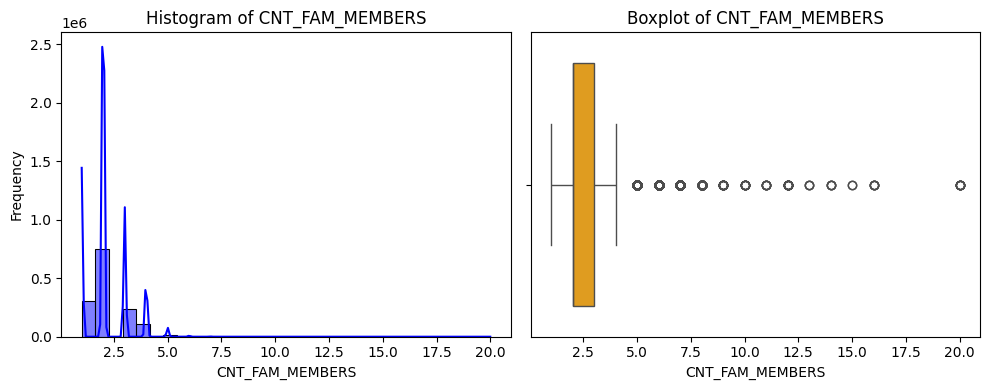

Numerical Variable:REGION_RATING_CLIENT
Mean: 2.06
Median: 2.00
Mode: [2.]
Standard Deviation: 0.50
Variance: 0.25
Skewness: 0.13


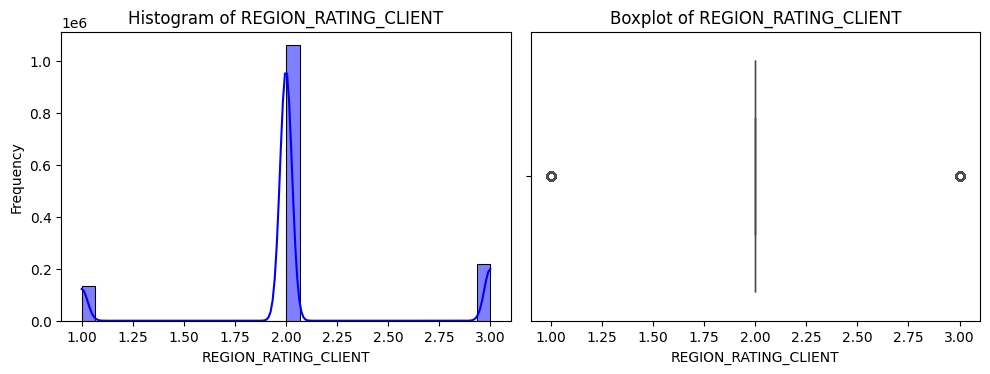

Numerical Variable:REGION_RATING_CLIENT_W_CITY
Mean: 2.04
Median: 2.00
Mode: [2.]
Standard Deviation: 0.49
Variance: 0.24
Skewness: 0.09


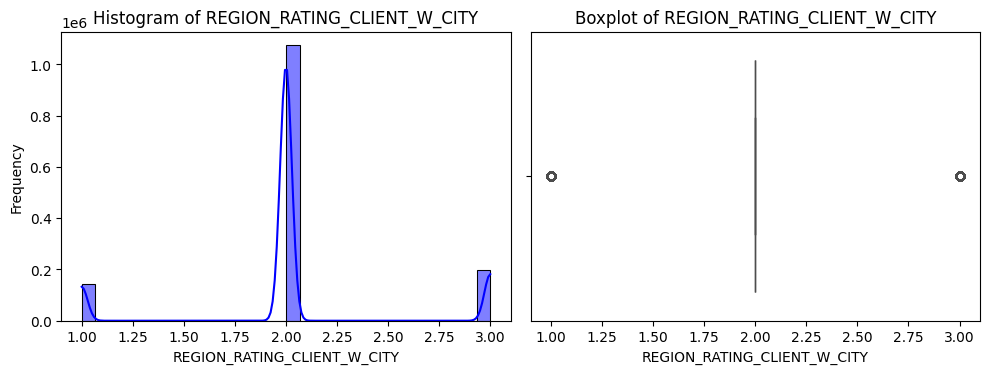

Numerical Variable:HOUR_APPR_PROCESS_START
Mean: 11.98
Median: 12.00
Mode: [10.]
Standard Deviation: 3.23
Variance: 10.45
Skewness: 0.00


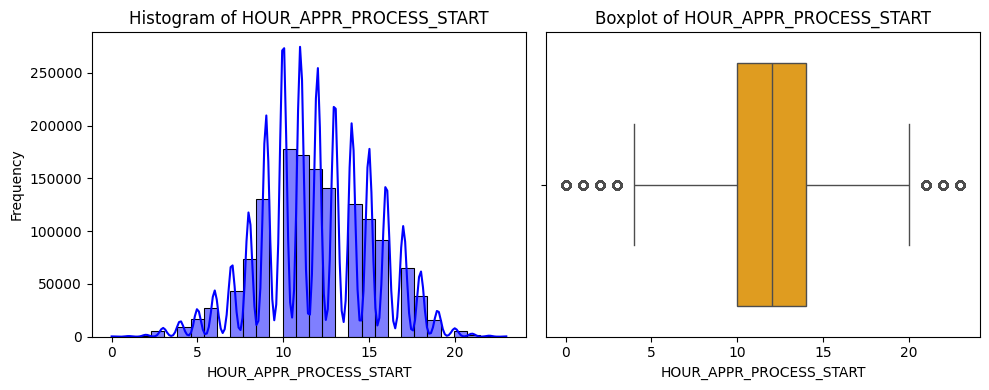

Numerical Variable:REG_REGION_NOT_LIVE_REGION
Mean: 0.01
Median: 0.00
Mode: [0.]
Standard Deviation: 0.11
Variance: 0.01
Skewness: 8.94


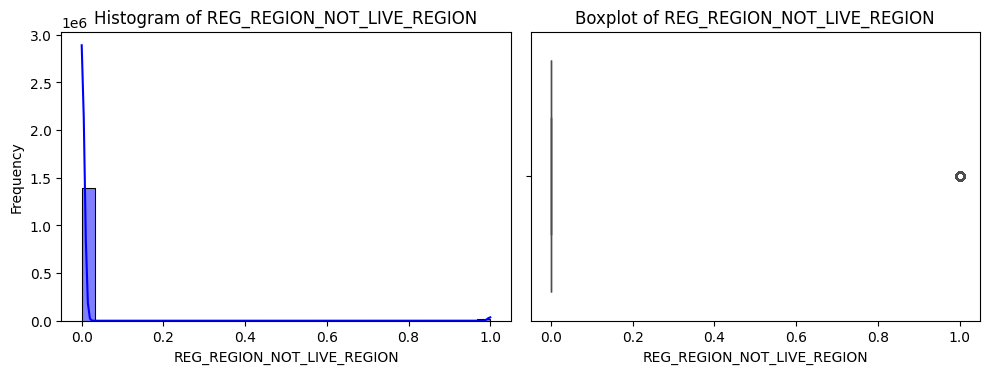

Numerical Variable:REG_REGION_NOT_WORK_REGION
Mean: 0.04
Median: 0.00
Mode: [0.]
Standard Deviation: 0.21
Variance: 0.04
Skewness: 4.45


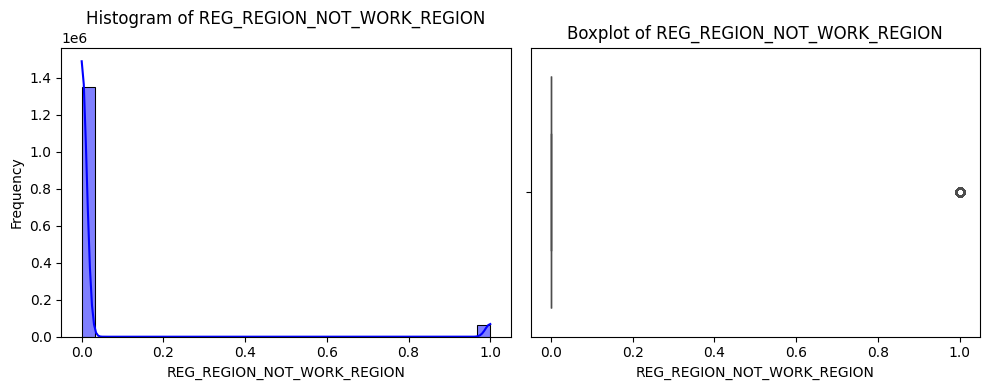

Numerical Variable:LIVE_REGION_NOT_WORK_REGION
Mean: 0.04
Median: 0.00
Mode: [0.]
Standard Deviation: 0.19
Variance: 0.03
Skewness: 4.98


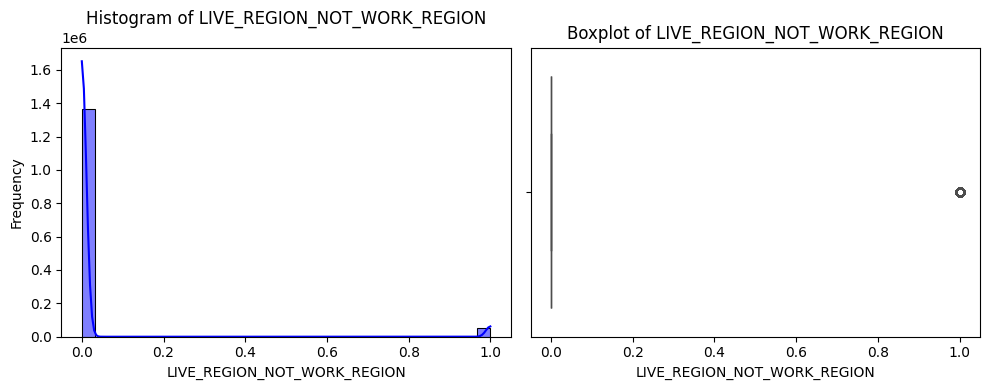

Numerical Variable:REG_CITY_NOT_LIVE_CITY
Mean: 0.07
Median: 0.00
Mode: [0.]
Standard Deviation: 0.26
Variance: 0.07
Skewness: 3.27


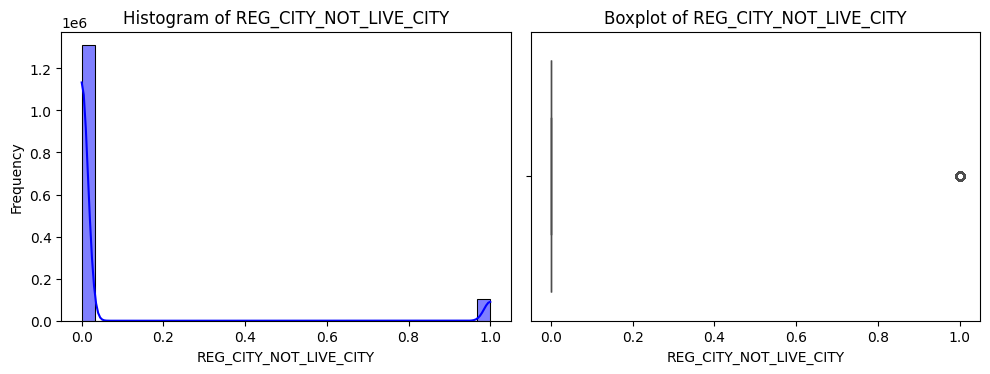

Numerical Variable:REG_CITY_NOT_WORK_CITY
Mean: 0.22
Median: 0.00
Mode: [0.]
Standard Deviation: 0.42
Variance: 0.17
Skewness: 1.34


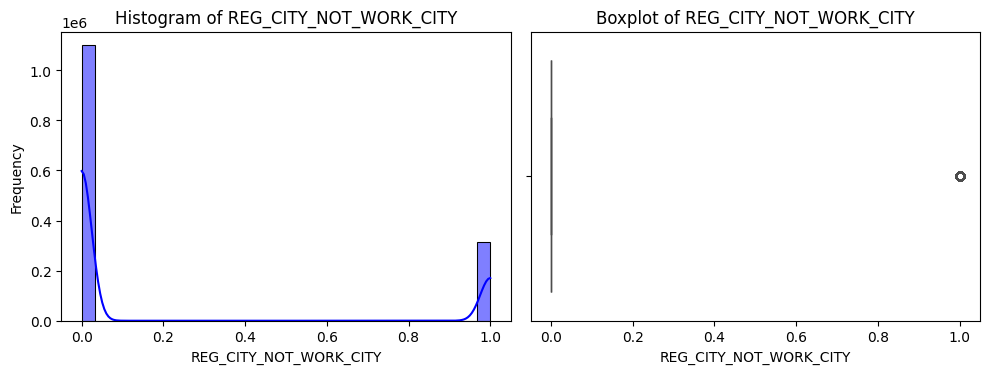

Numerical Variable:LIVE_CITY_NOT_WORK_CITY
Mean: 0.17
Median: 0.00
Mode: [0.]
Standard Deviation: 0.38
Variance: 0.14
Skewness: 1.72


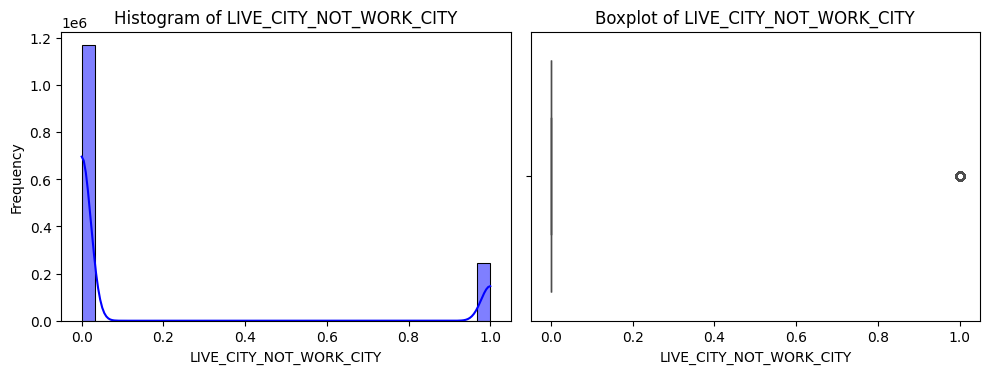

Numerical Variable:OBS_30_CNT_SOCIAL_CIRCLE
Mean: 1.54
Median: 0.00
Mode: [0.]
Standard Deviation: 2.53
Variance: 6.39
Skewness: 7.87


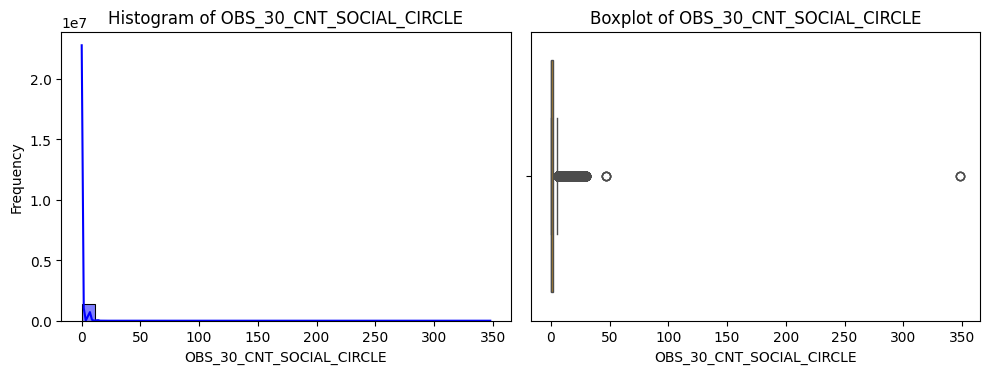

Numerical Variable:DEF_30_CNT_SOCIAL_CIRCLE
Mean: 0.15
Median: 0.00
Mode: [0.]
Standard Deviation: 0.47
Variance: 0.22
Skewness: 4.57


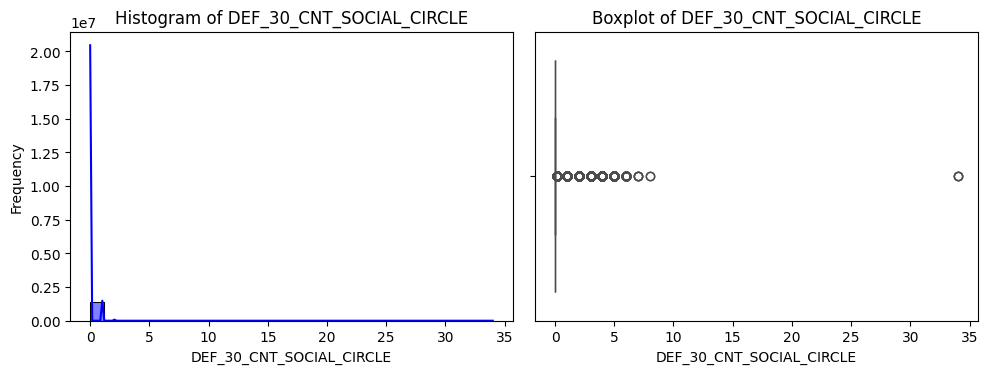

Numerical Variable:OBS_60_CNT_SOCIAL_CIRCLE
Mean: 1.53
Median: 0.00
Mode: [0.]
Standard Deviation: 2.51
Variance: 6.28
Skewness: 7.83


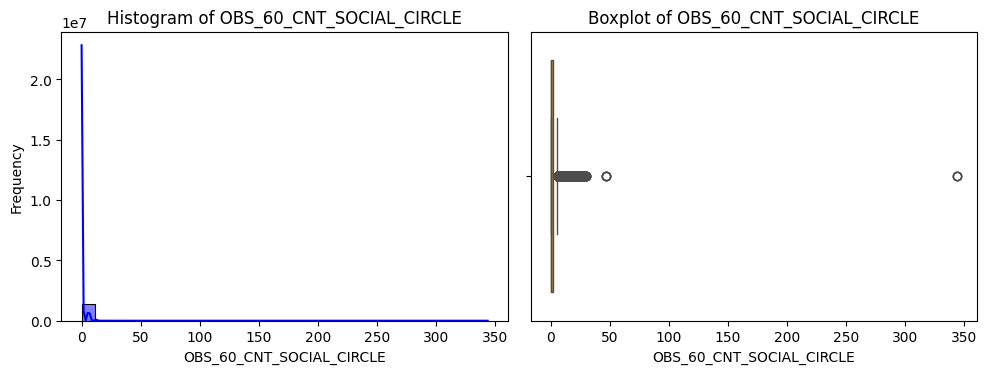

Numerical Variable:DEF_60_CNT_SOCIAL_CIRCLE
Mean: 0.11
Median: 0.00
Mode: [0.]
Standard Deviation: 0.38
Variance: 0.14
Skewness: 4.85


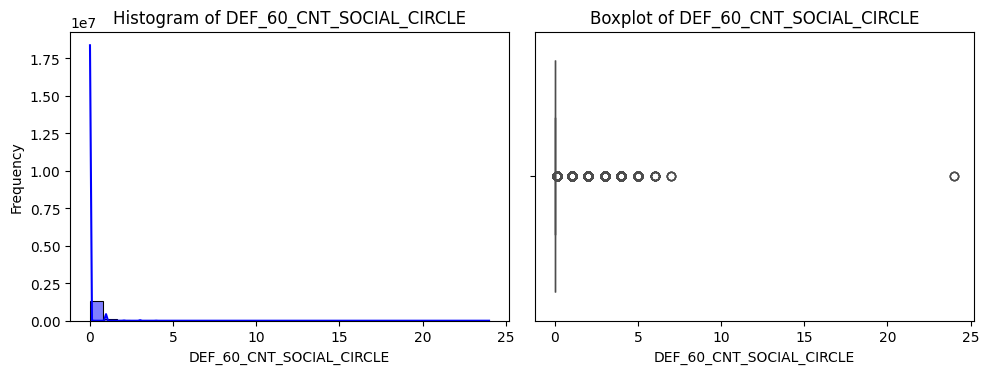

Numerical Variable:DAYS_LAST_PHONE_CHANGE
Mean: 1084.70
Median: 1011.00
Mode: [0.]
Standard Deviation: 799.94
Variance: 639898.97
Skewness: 0.42


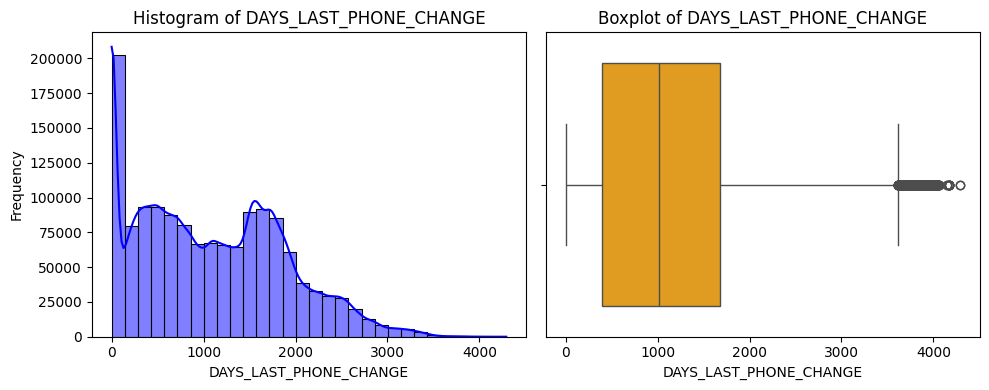

Numerical Variable:AMT_REQ_CREDIT_BUREAU_HOUR
Mean: 0.01
Median: 0.00
Mode: [0.]
Standard Deviation: 0.08
Variance: 0.01
Skewness: 15.30


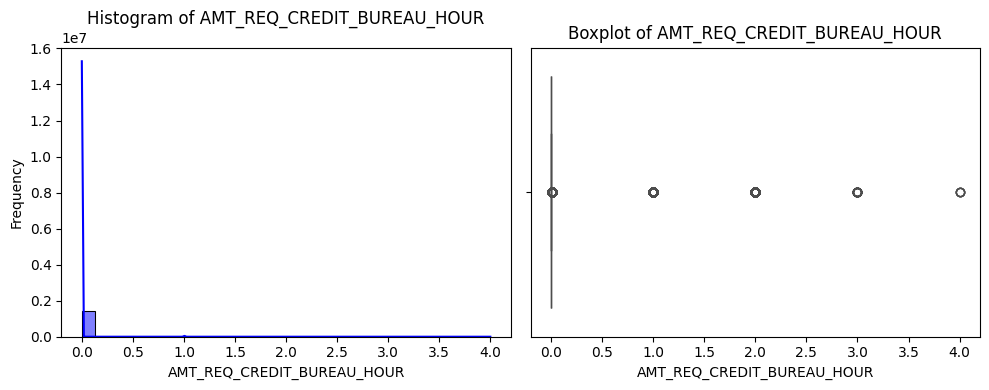

Numerical Variable:AMT_REQ_CREDIT_BUREAU_DAY
Mean: 0.01
Median: 0.00
Mode: [0.]
Standard Deviation: 0.10
Variance: 0.01
Skewness: 31.45


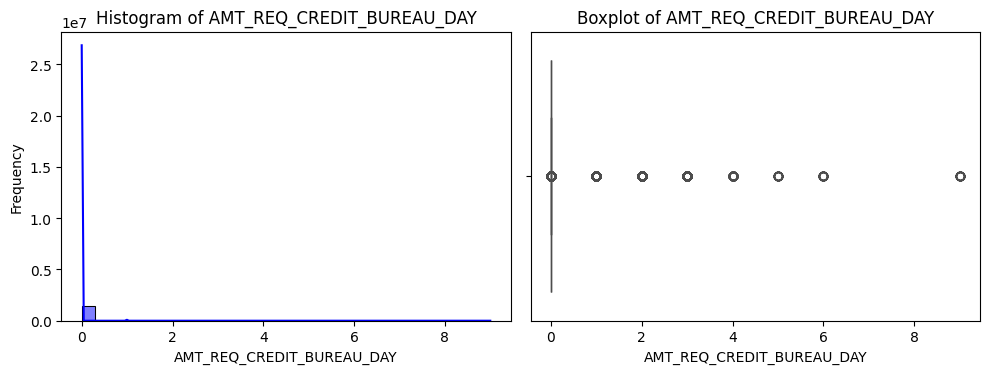

Numerical Variable:AMT_REQ_CREDIT_BUREAU_WEEK
Mean: 0.04
Median: 0.00
Mode: [0.]
Standard Deviation: 0.20
Variance: 0.04
Skewness: 9.29


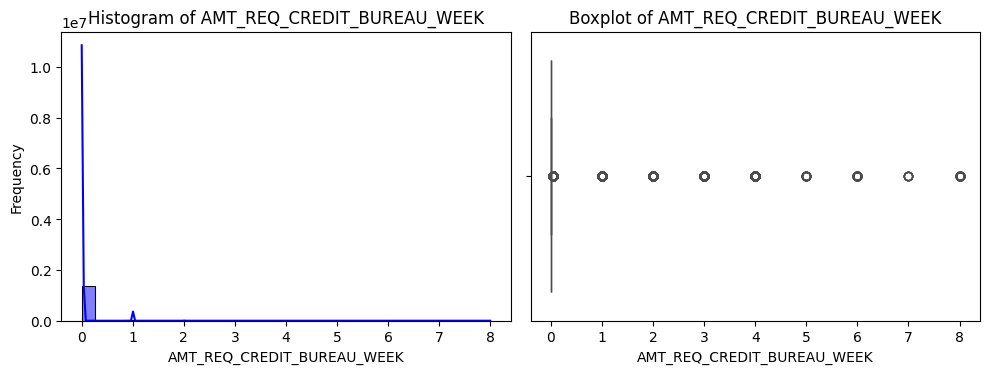

Numerical Variable:AMT_REQ_CREDIT_BUREAU_MON
Mean: 0.30
Median: 0.00
Mode: [0.]
Standard Deviation: 0.92
Variance: 0.85
Skewness: 8.13


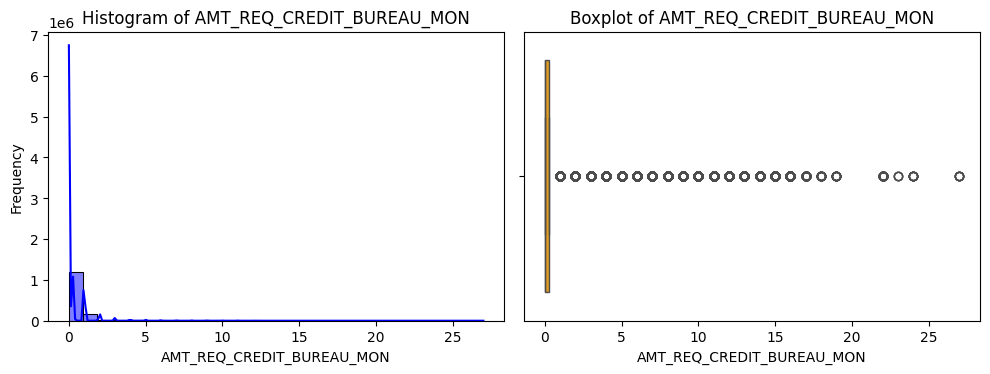

Numerical Variable:AMT_REQ_CREDIT_BUREAU_QRT
Mean: 0.35
Median: 0.00
Mode: [0.]
Standard Deviation: 0.87
Variance: 0.76
Skewness: 114.93


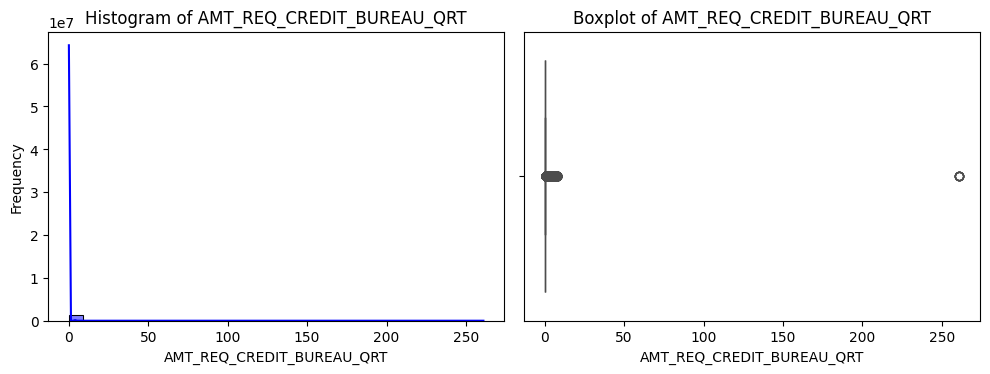

Numerical Variable:AMT_REQ_CREDIT_BUREAU_YEAR
Mean: 2.80
Median: 2.00
Mode: [2.]
Standard Deviation: 2.09
Variance: 4.38
Skewness: 1.07


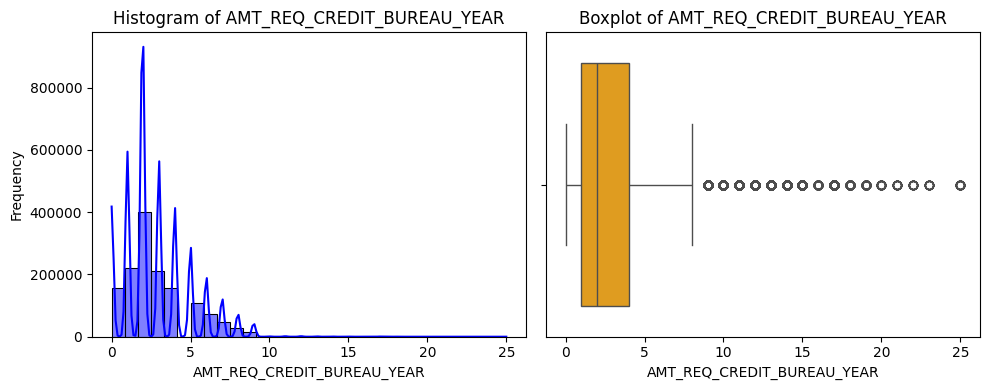

In [12]:
univariate_analysis_numerical(df, numeric_columns[1:])

2) FOR CATEGORICAL COLUMNS

In [18]:
def univariate_analysis_categorical(dataframe, categorical_columns, palette='pastel', figsize=(10, 6)):
    sns.set_palette(palette)

    # Iterate over each categorical column and plot a horizontal count plot
    for column in categorical_columns:
        plt.figure(figsize=figsize)
        sns.countplot(y=column, data=dataframe)  # Set y for horizontal bars
        plt.title(f'Count Plot for {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()

In [16]:
def univariate_analysis_categorical(dataframe, categorical_columns, palette=None, figsize=(10, 6)):
    # Define a custom palette if none is provided
    if palette is None:
        palette = sns.color_palette(["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2"])

    sns.set_palette(palette)

    # Iterate over each categorical column and plot a horizontal count plot
    for column in categorical_columns:
        plt.figure(figsize=figsize)
        sns.countplot(y=column, data=dataframe)  # Set y for horizontal bars
        plt.title(f'Count Plot for {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()


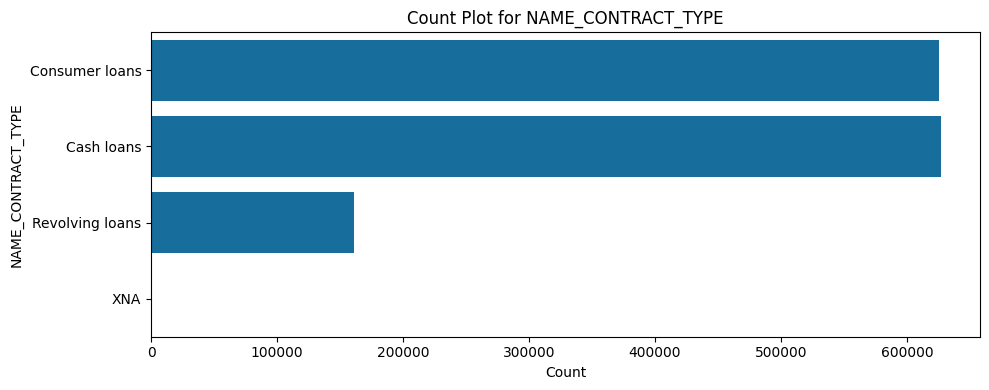

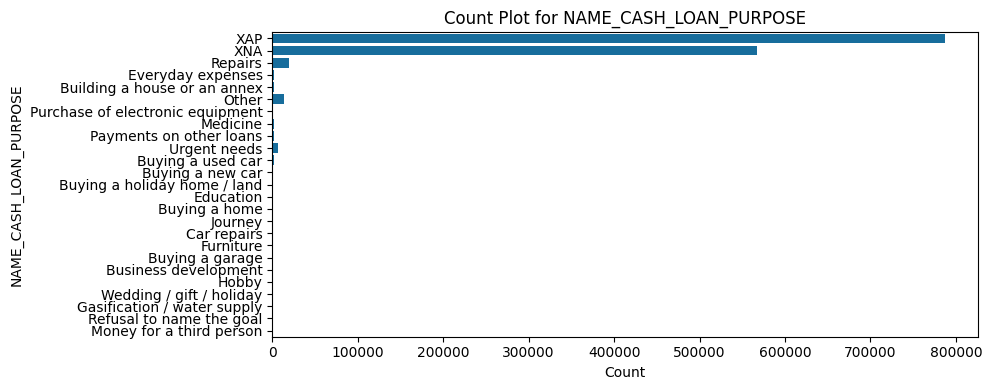

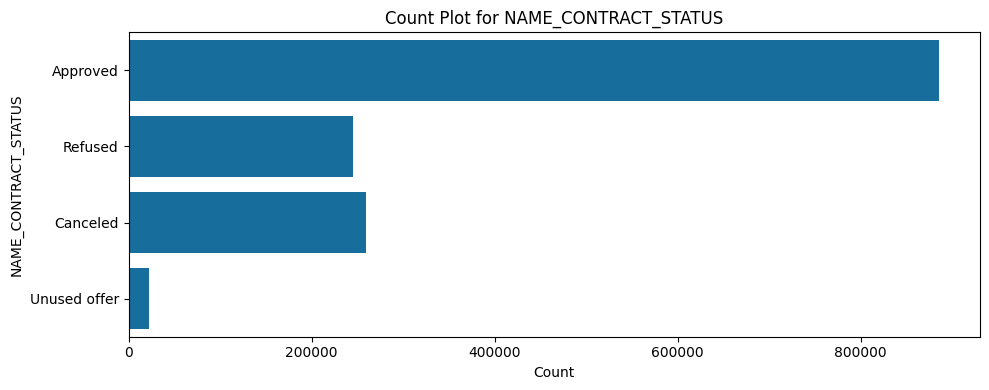

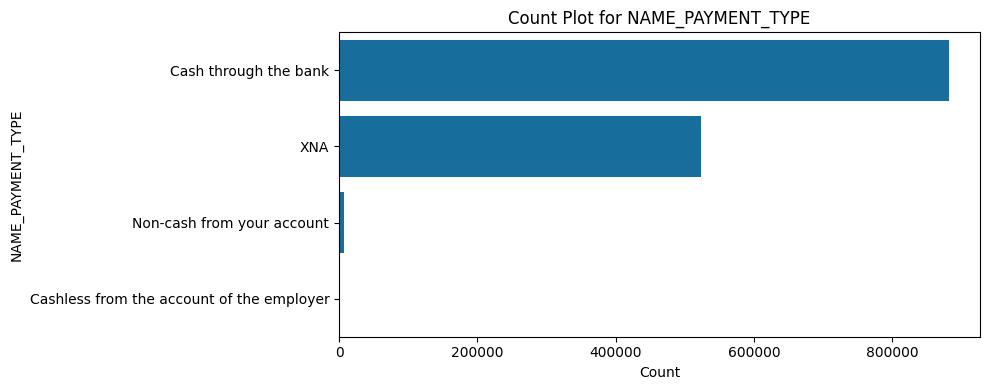

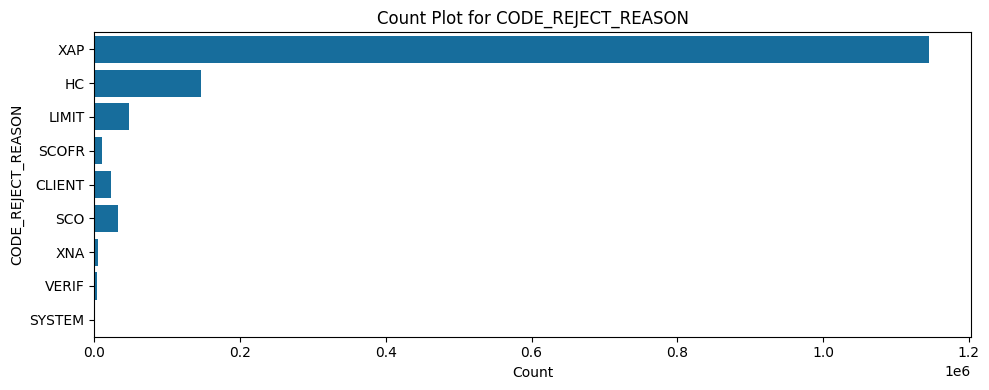

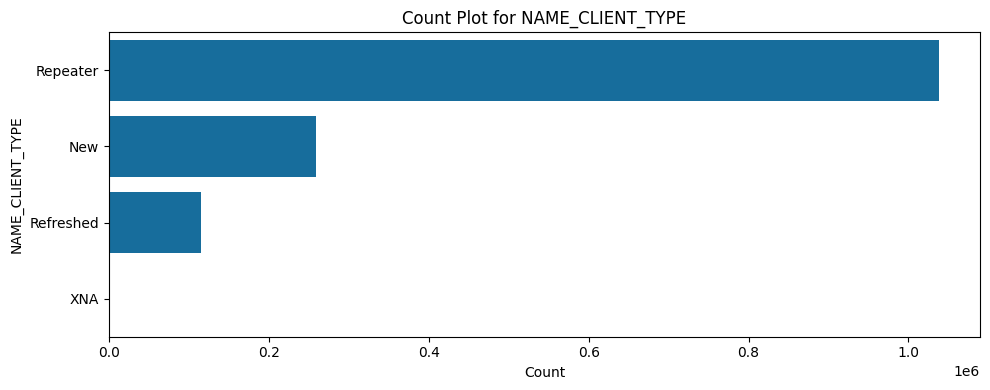

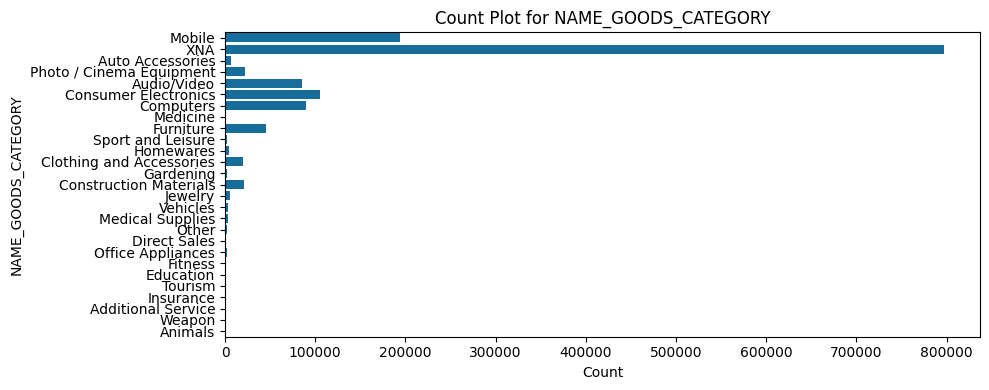

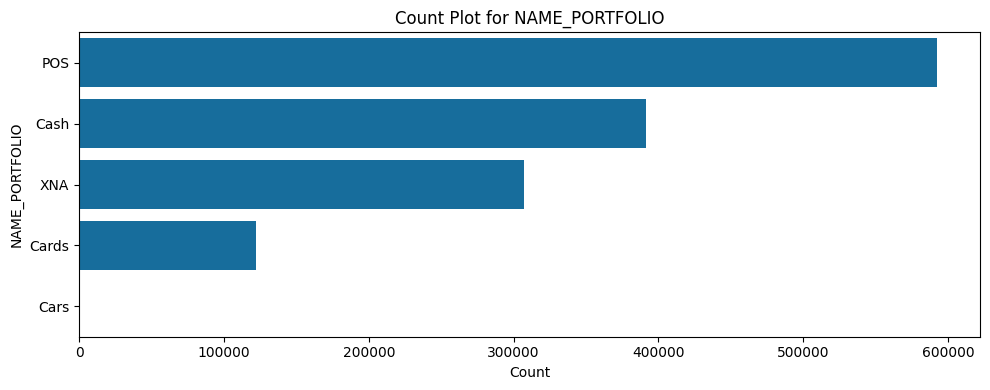

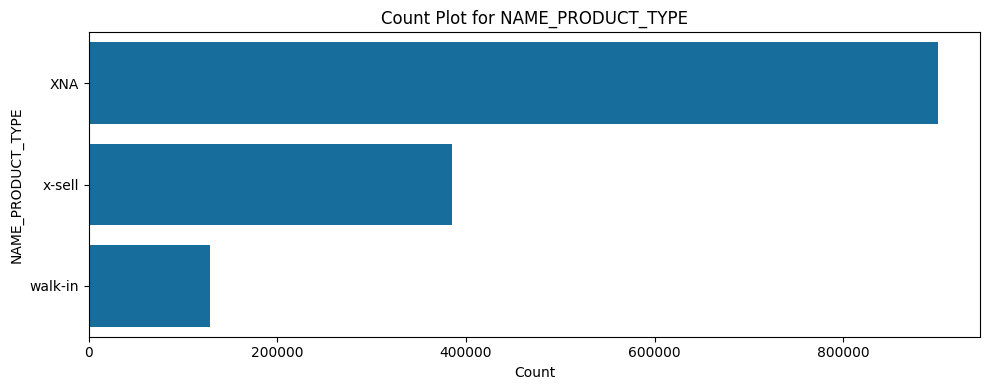

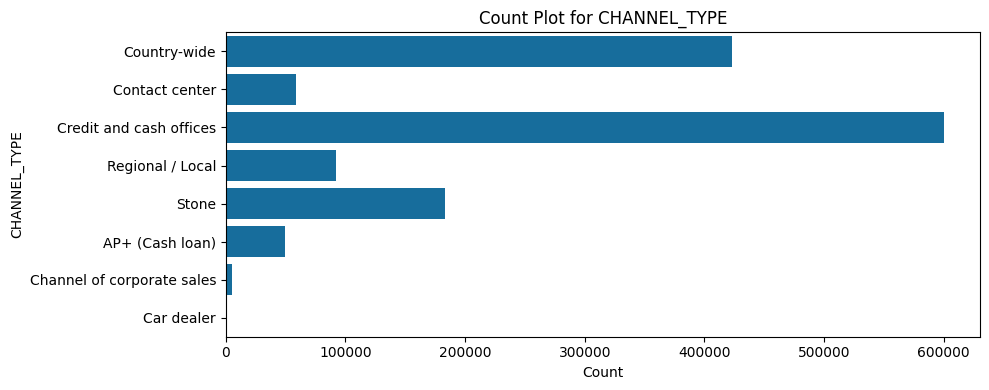

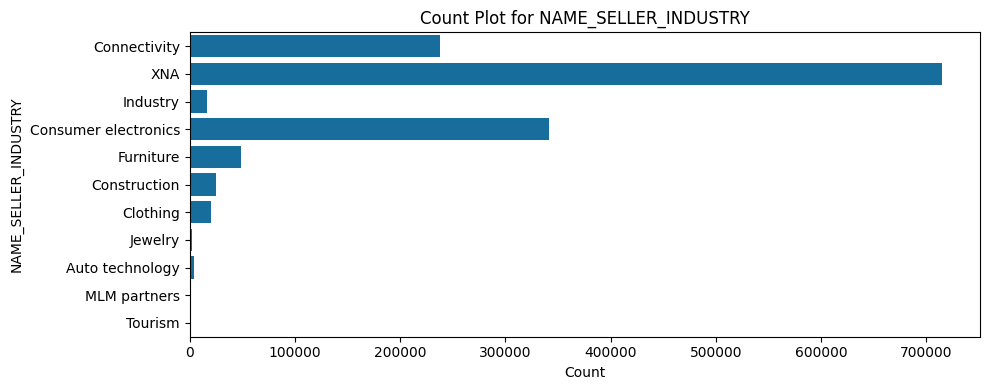

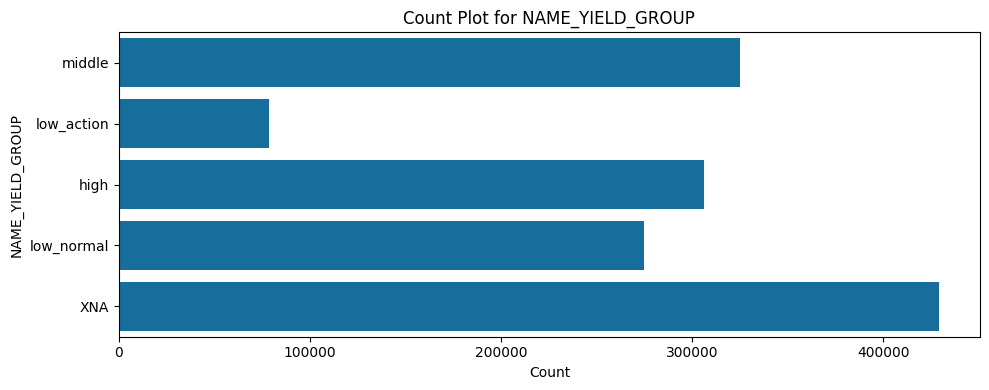

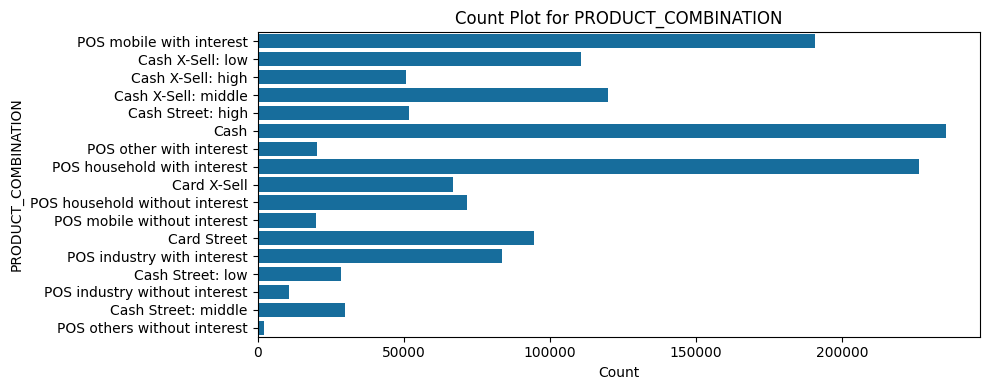

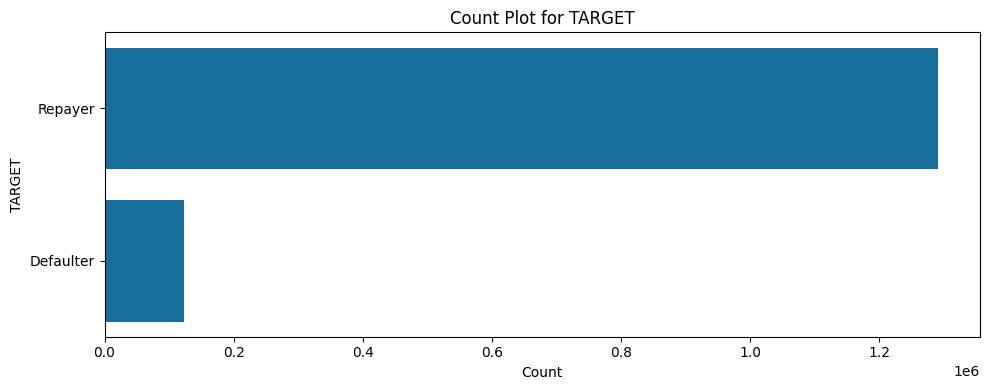

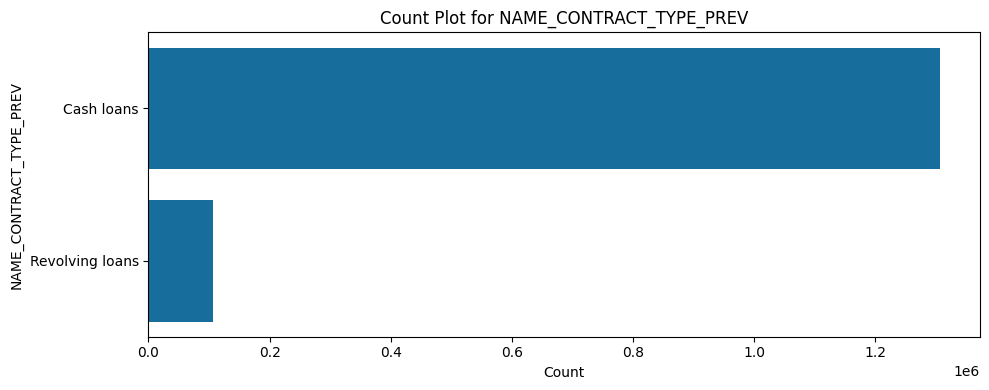

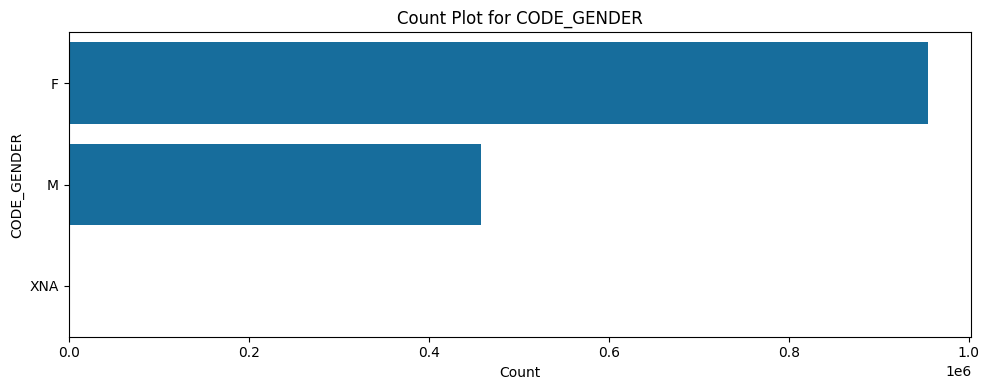

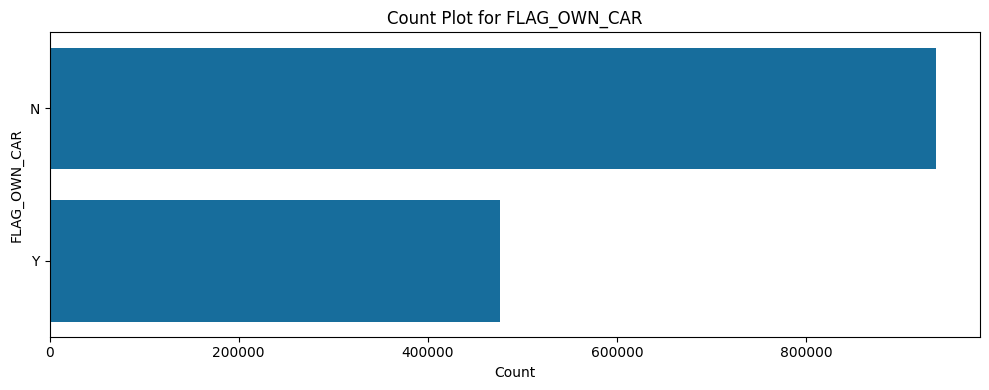

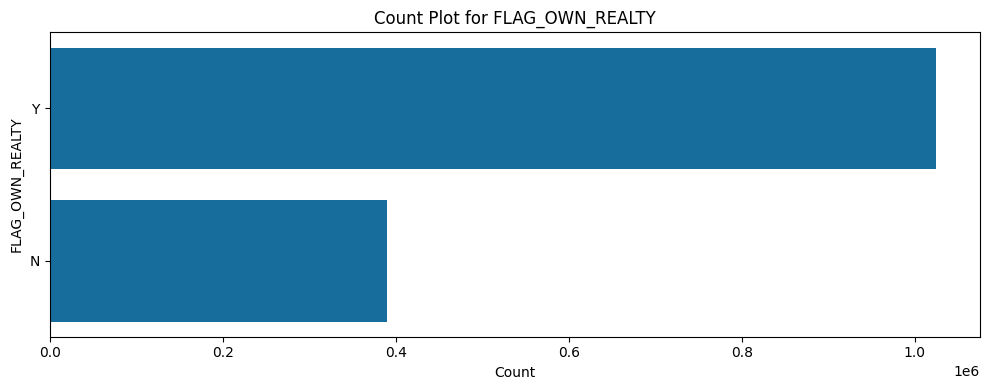

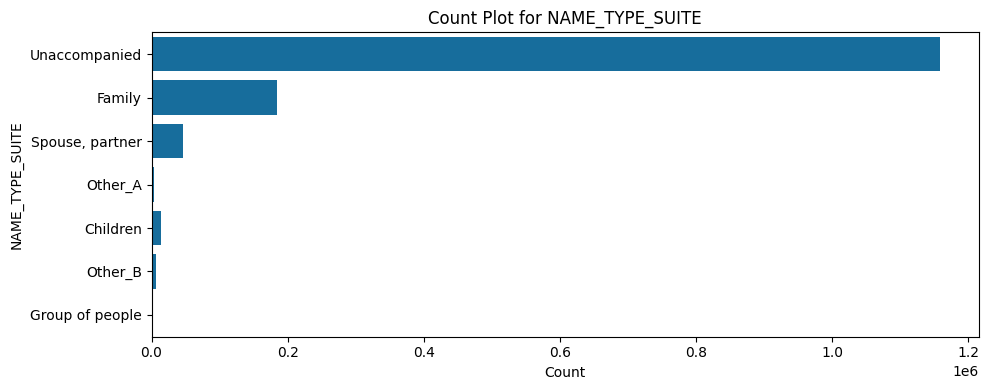

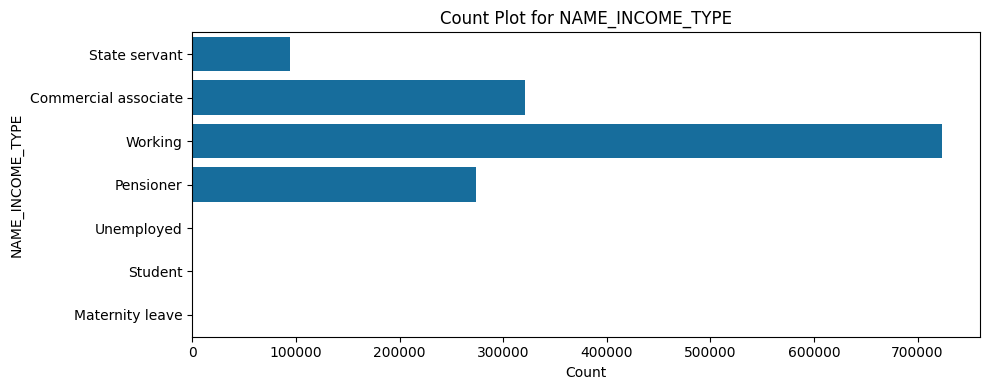

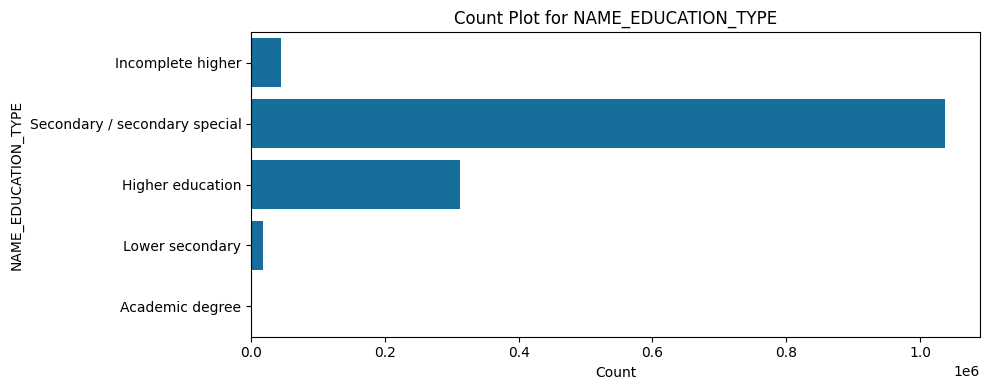

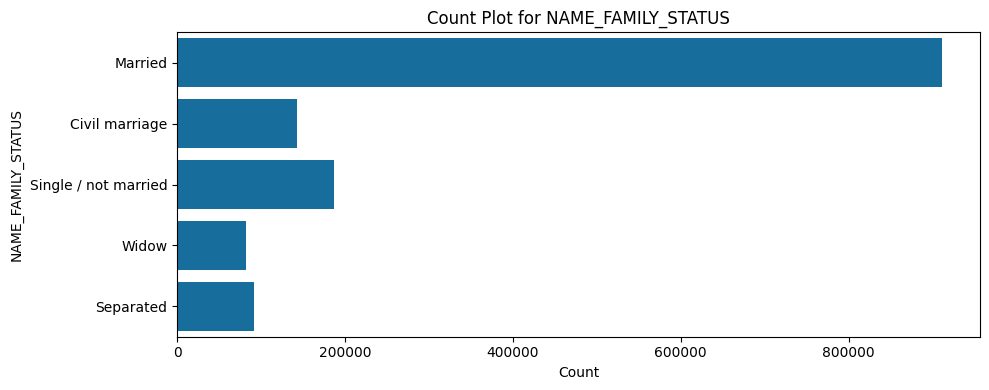

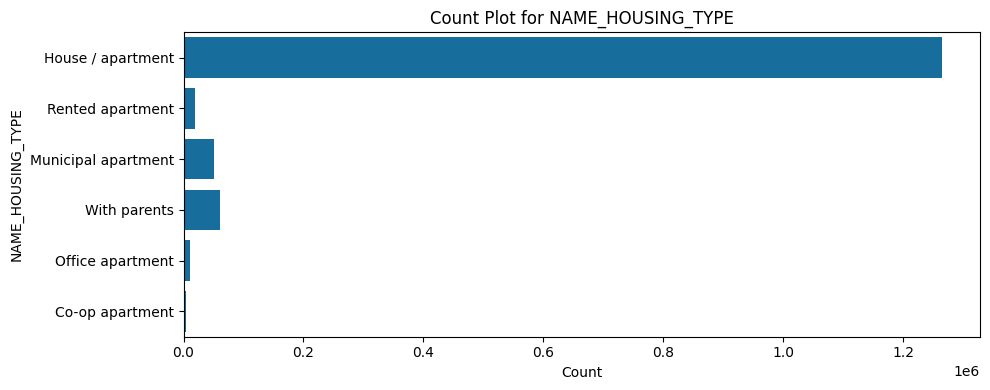

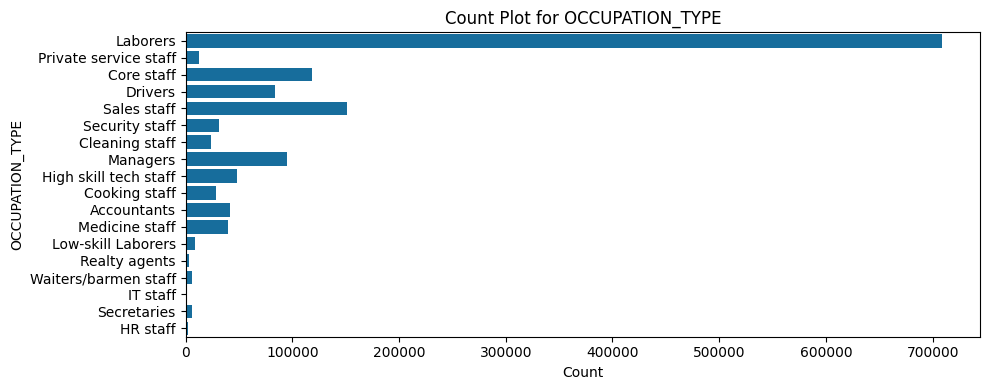

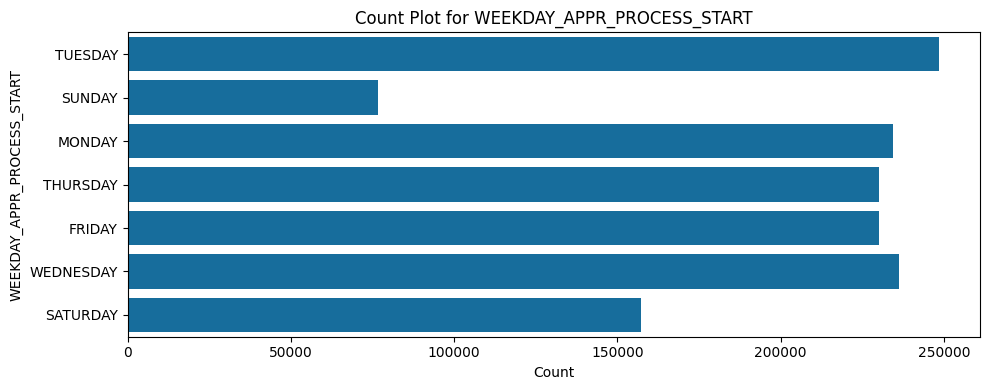

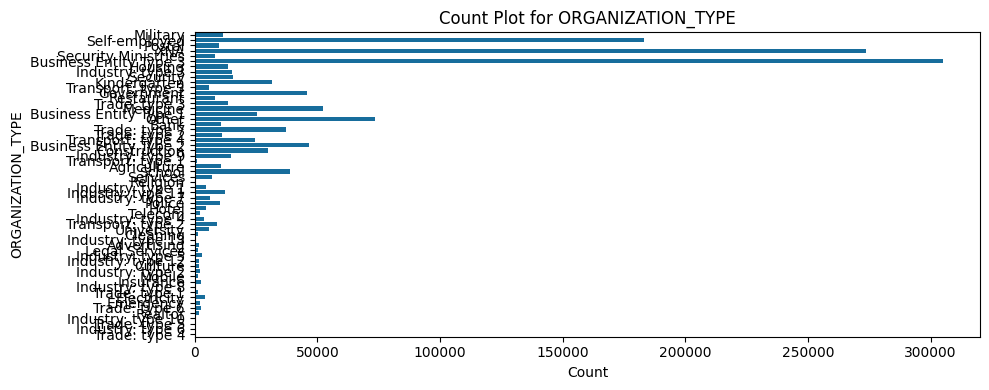

In [30]:
univariate_analysis_categorical(df, object_columns, palette='colorblind', figsize=(10, 4))

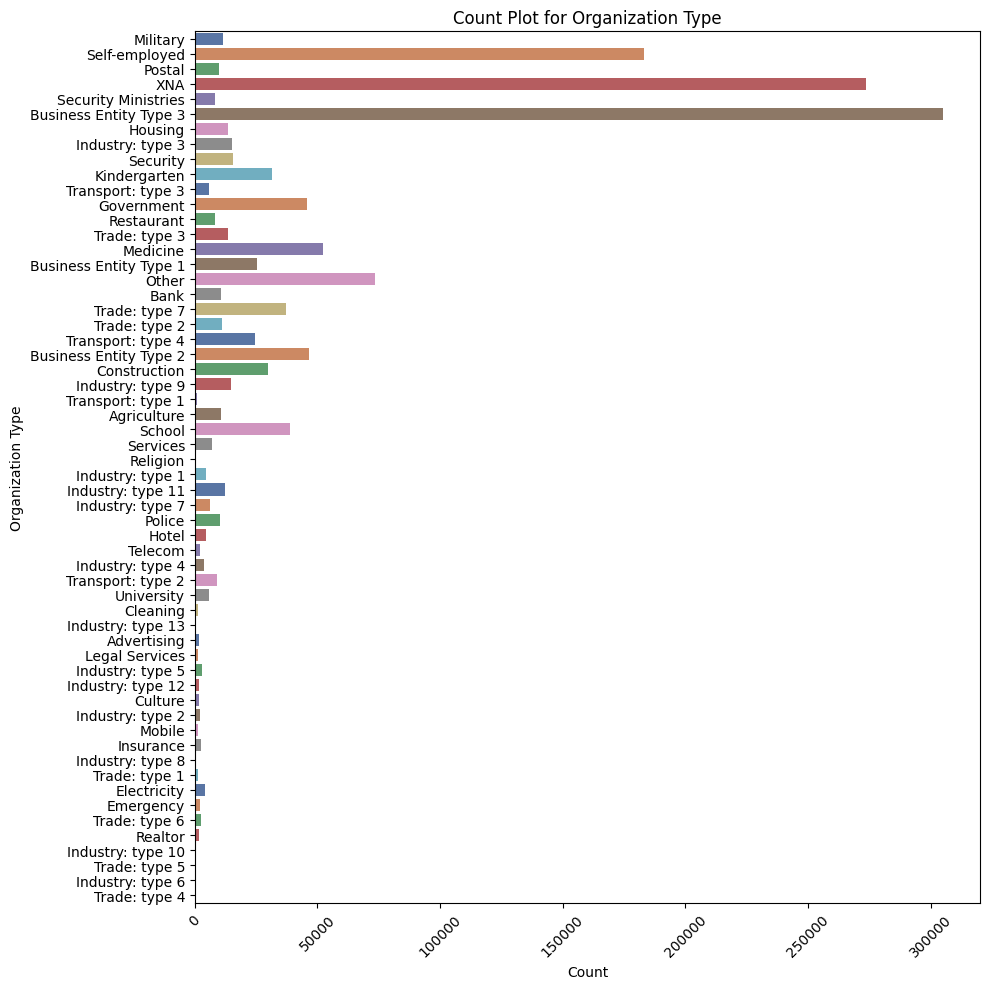

In [15]:
plt.figure(figsize=(10, 10))

sns.countplot(y="ORGANIZATION_TYPE", data=df, palette='deep')
plt.ylabel("Organization Type")
plt.xlabel('Count')
plt.title("Count Plot for Organization Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS

In [38]:
def analyze_numerical_vs_categorical(df, num_col, cat_col):
    """Analyze the relationship between a numerical and a categorical variable."""
    print(f'Numerical vs. Categorical:{num_col} and {cat_col}')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cat_col, y=num_col, data=df, palette='viridis')
    plt.title(f'Boxplot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    plt.show()

In [47]:
def analyze_numerical_vs_numerical(df, col1, col2):
    """Analyze the relationship between two numerical variables."""
    print(f'Numerical vs. Numerical: {col1} and {col2}')
    
    # Create a scatter plot with a regression line
    plt.figure(figsize=(8, 4))
    sns.regplot(x=col1, y=col2, data=df, scatter_kws={'alpha': 0.5}, line_kws={"color": "r"})
    
    # Set the axis limits to start at zero
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    
    # Add title and labels
    plt.title(f'Scatter Plot of {col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    
    # Show plot
    plt.show()

In [49]:
def analyze_numerical_vs_numerical(df, col1, col2):
    """Analyze the relationship between two numerical variables."""
    print(f'Numerical vs. Numerical:{col1} and {col2}')
    plt.figure(figsize=(8, 4))
    sns.regplot(x=col1, y=col2, data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"r"})
    plt.title(f'Scatter Plot of {col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [40]:
def analyze_categorical_vs_categorical(df, col1, col2):
    """Analyze the relationship between two categorical variables."""
    print(f'Categorical vs. Categorical:{col1} and {col2}')
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col1, hue=col2, data=df, palette="Set1")
    plt.title(f'Bar Plot of {col1} by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Analyzing NUMERICAL VS. CATEGORICAL

Numerical vs. Categorical:AMT_APPLICATION and NAME_CONTRACT_TYPE


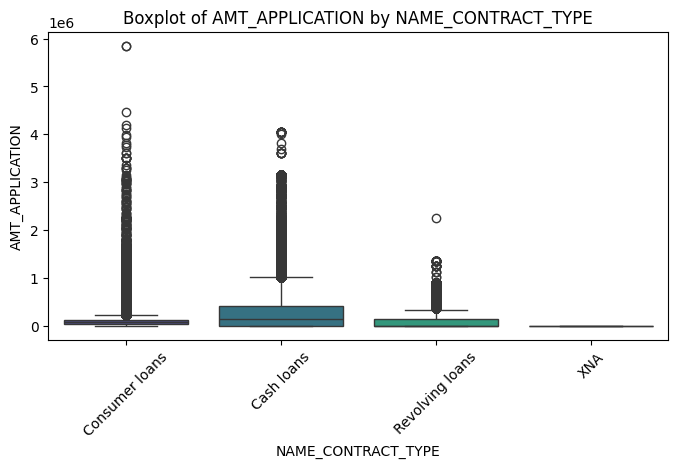

In [41]:
analyze_numerical_vs_categorical(df, "AMT_APPLICATION", "NAME_CONTRACT_TYPE")

Numerical vs. Categorical:AMT_INCOME_TOTAL and CODE_GENDER


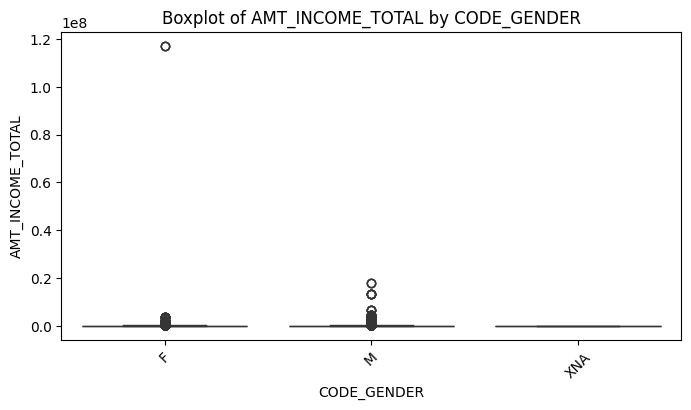

In [42]:
analyze_numerical_vs_categorical(df, "AMT_INCOME_TOTAL", "CODE_GENDER")

Numerical vs. Categorical:AMT_CREDIT and NAME_INCOME_TYPE


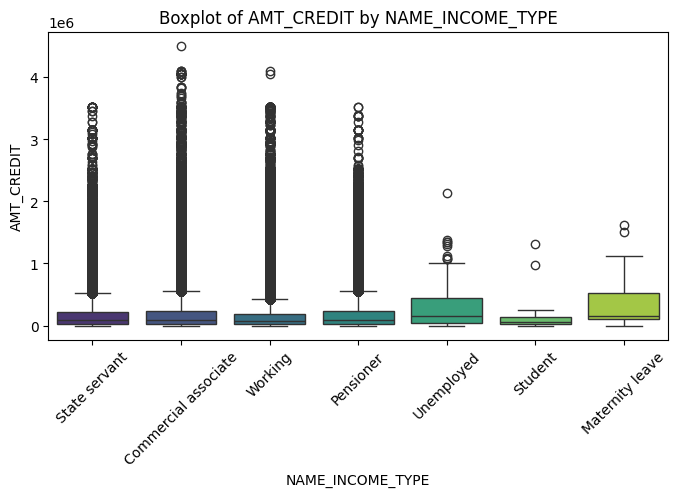

In [43]:
analyze_numerical_vs_categorical(df, "AMT_CREDIT", "NAME_INCOME_TYPE")

Numerical vs. Categorical:AMT_ANNUITY and NAME_EDUCATION_TYPE


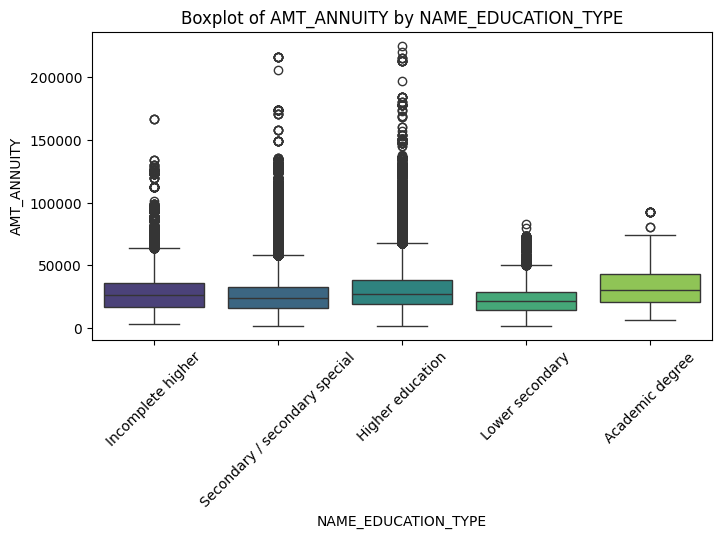

In [44]:
analyze_numerical_vs_categorical(df, "AMT_ANNUITY", "NAME_EDUCATION_TYPE")

Numerical vs. Categorical:DAYS_BIRTH and NAME_FAMILY_STATUS


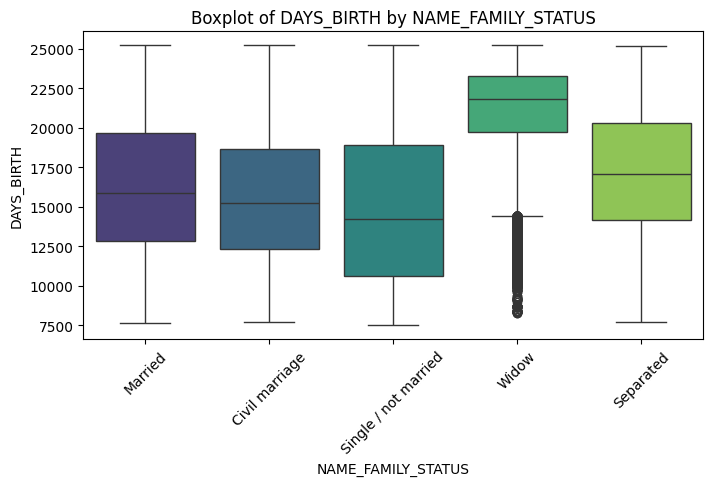

In [45]:
analyze_numerical_vs_categorical(df, "DAYS_BIRTH", "NAME_FAMILY_STATUS") 

Analyzing NUMERICAL VS. NUMERICAL

Numerical vs. Numerical:AMT_APPLICATION and AMT_CREDIT


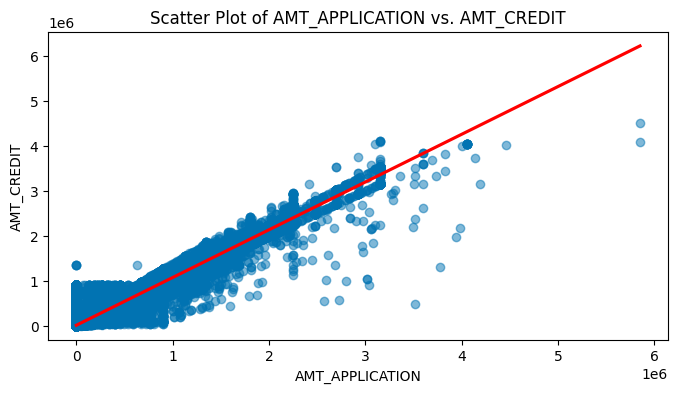

In [50]:
analyze_numerical_vs_numerical(df, "AMT_APPLICATION", "AMT_CREDIT")

Numerical vs. Numerical:AMT_CREDIT_PREV and AMT_ANNUITY


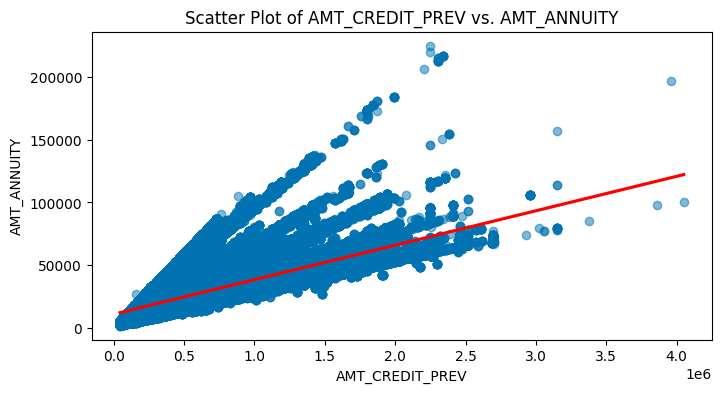

In [51]:
analyze_numerical_vs_numerical(df, "AMT_CREDIT_PREV", "AMT_ANNUITY") 

Numerical vs. Numerical:AMT_ANNUITY and AMT_GOODS_PRICE


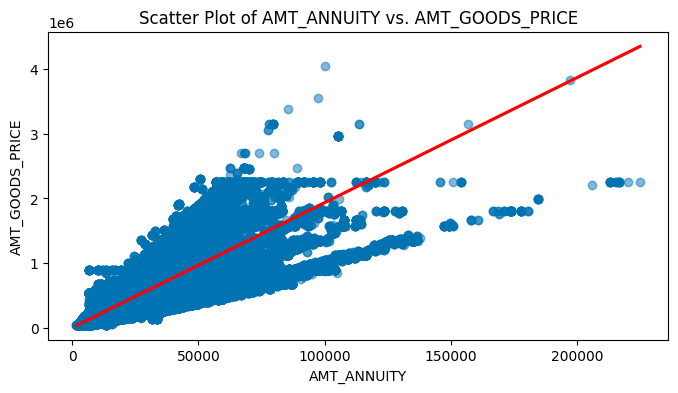

In [52]:
analyze_numerical_vs_numerical(df, "AMT_ANNUITY", "AMT_GOODS_PRICE")

Numerical vs. Numerical:AMT_CREDIT_PREV and AMT_GOODS_PRICE


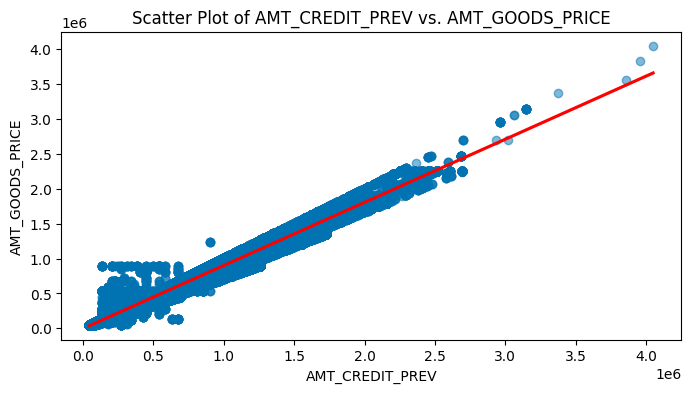

In [53]:
analyze_numerical_vs_numerical(df, "AMT_CREDIT_PREV", "AMT_GOODS_PRICE") 

Numerical vs. Numerical:AMT_INCOME_TOTAL and AMT_CREDIT


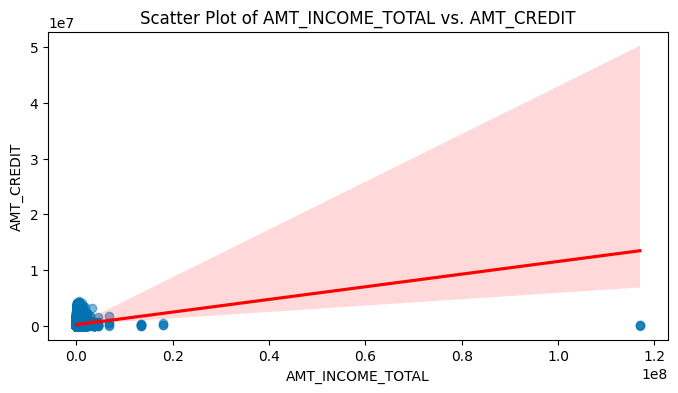

In [54]:
analyze_numerical_vs_numerical(df, "AMT_INCOME_TOTAL", "AMT_CREDIT")

Numerical vs. Numerical:DAYS_EMPLOYED and AMT_INCOME_TOTAL


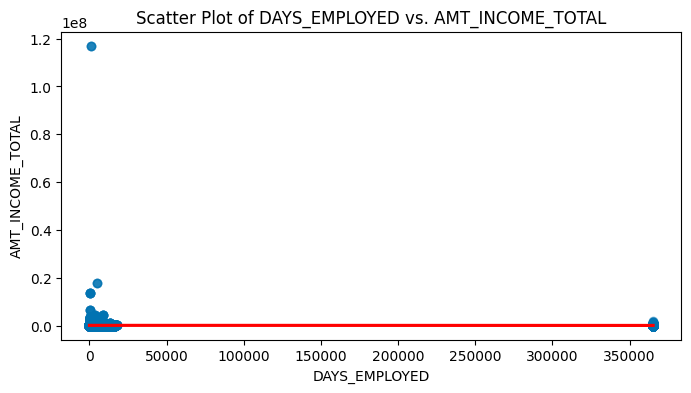

In [55]:
analyze_numerical_vs_numerical(df, "DAYS_EMPLOYED", "AMT_INCOME_TOTAL") 

Numerical vs. Numerical:CNT_CHILDREN and AMT_INCOME_TOTAL


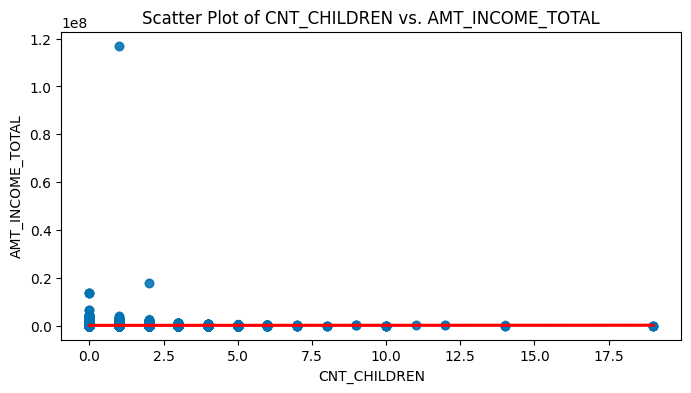

In [56]:
analyze_numerical_vs_numerical(df, "CNT_CHILDREN", "AMT_INCOME_TOTAL") 

Analyzing CATEGORICAL VS. NUMERICAL

Categorical vs. Categorical:NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS


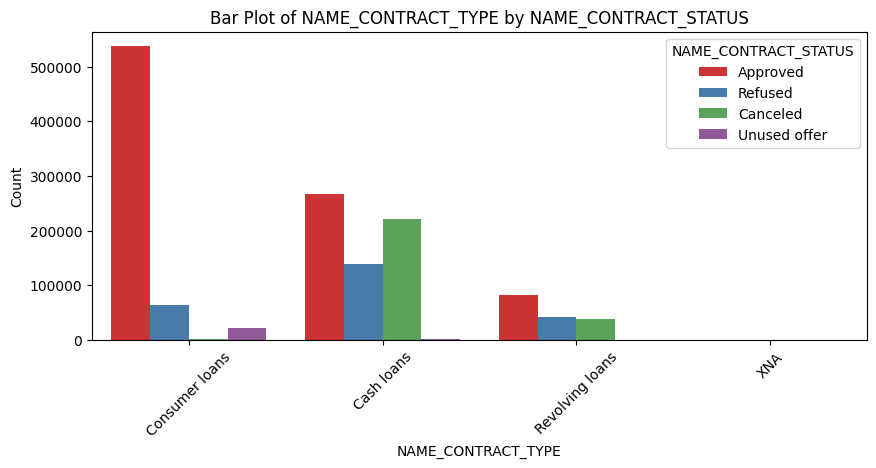

In [31]:
analyze_categorical_vs_categorical(df, "NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS") 

Categorical vs. Categorical:CODE_GENDER and NAME_FAMILY_STATUS


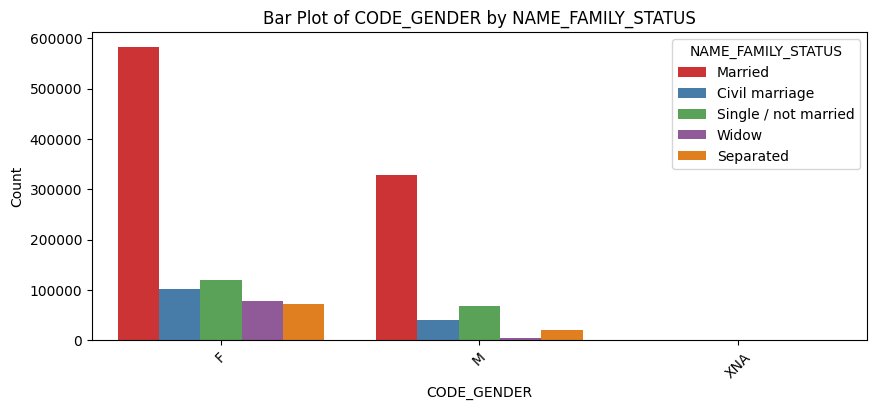

In [32]:
analyze_categorical_vs_categorical(df, "CODE_GENDER", "NAME_FAMILY_STATUS")

Categorical vs. Categorical:NAME_INCOME_TYPE and NAME_EDUCATION_TYPE


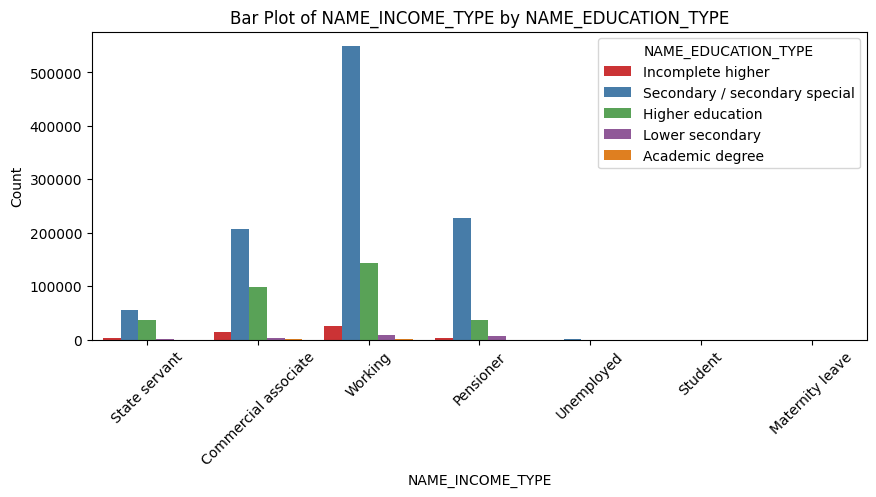

In [33]:
analyze_categorical_vs_categorical(df, "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE")

Categorical vs. Categorical:NAME_HOUSING_TYPE and NAME_FAMILY_STATUS


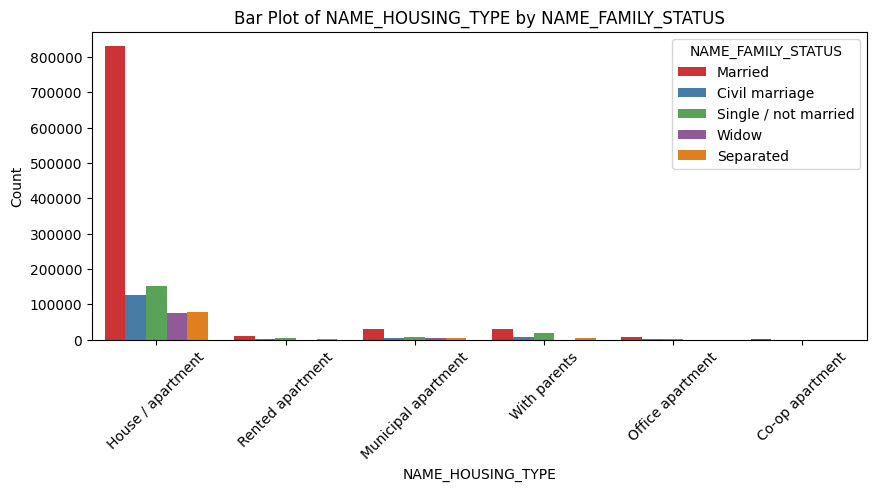

In [34]:
analyze_categorical_vs_categorical(df, "NAME_HOUSING_TYPE", "NAME_FAMILY_STATUS")

Categorical vs. Categorical:NAME_PORTFOLIO and CHANNEL_TYPE


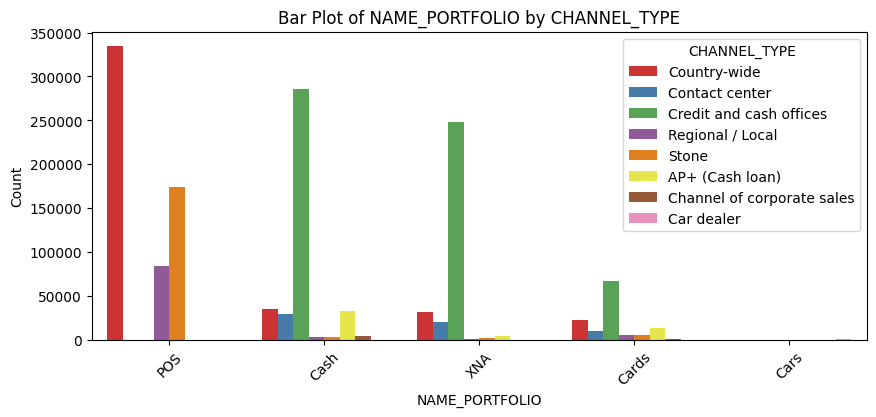

In [35]:
analyze_categorical_vs_categorical(df, "NAME_PORTFOLIO", "CHANNEL_TYPE")

Analyzing some feature with TARGET

Numerical vs. Categorical:AMT_APPLICATION and TARGET


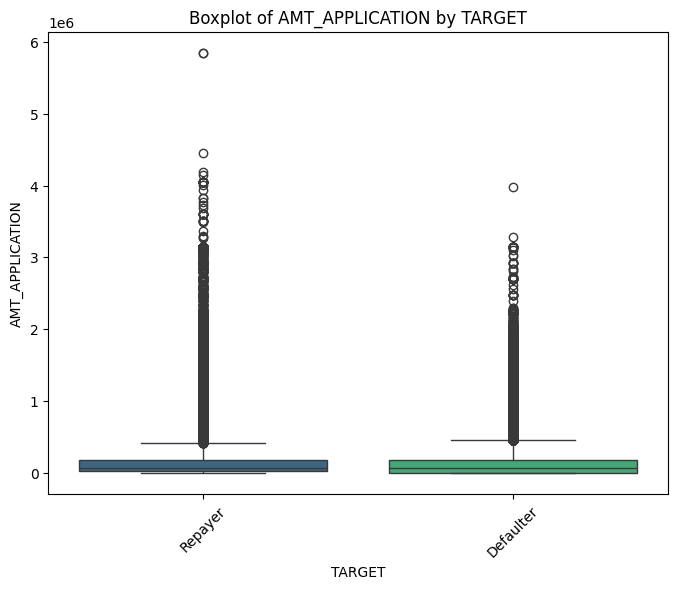

In [36]:
analyze_numerical_vs_categorical(df, "AMT_APPLICATION", "TARGET")

Numerical vs. Categorical:AMT_CREDIT and TARGET


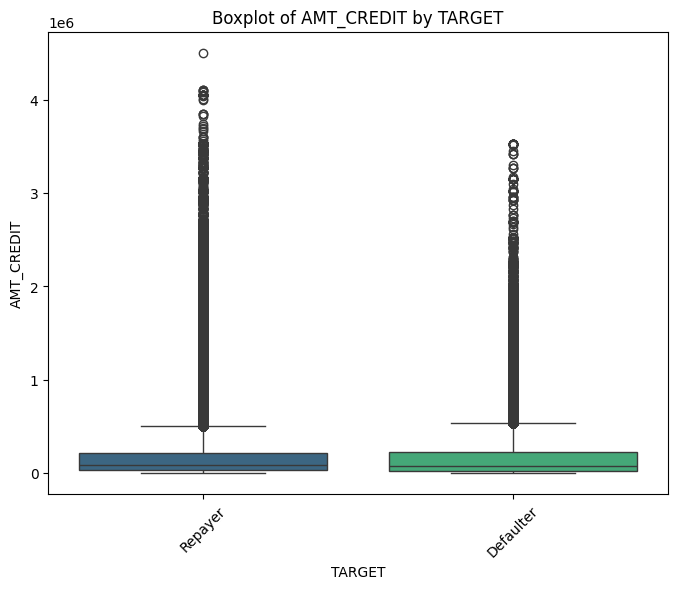

In [37]:
analyze_numerical_vs_categorical(df, "AMT_CREDIT", "TARGET")

Numerical vs. Categorical:AMT_ANNUITY and TARGET


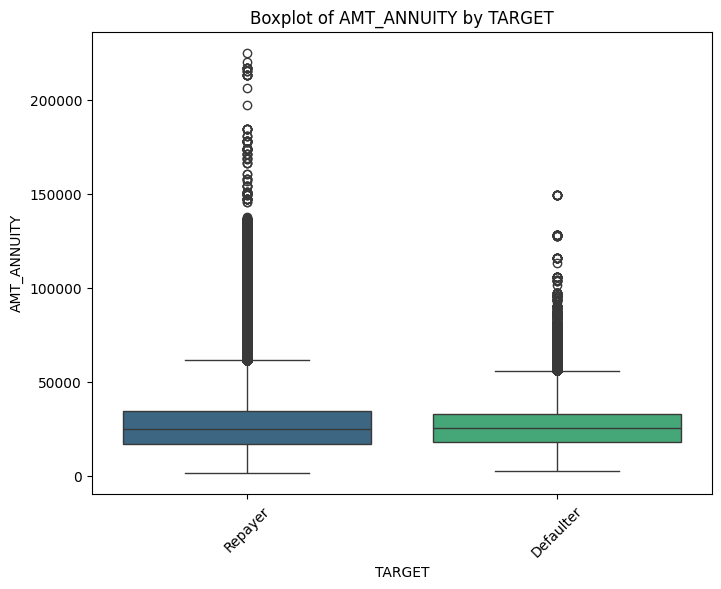

In [38]:
analyze_numerical_vs_categorical(df, "AMT_ANNUITY", "TARGET")

Numerical vs. Categorical:AMT_INCOME_TOTAL and TARGET


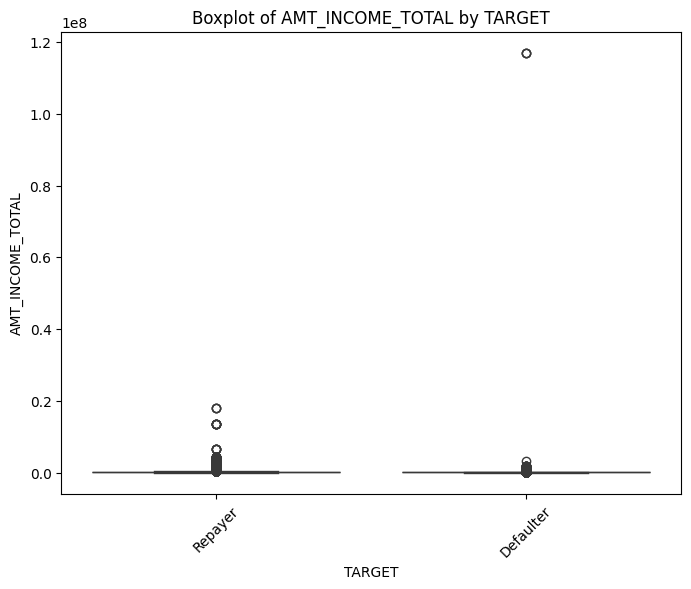

In [39]:
analyze_numerical_vs_categorical(df, "AMT_INCOME_TOTAL", "TARGET")

Numerical vs. Categorical:DAYS_EMPLOYED and TARGET


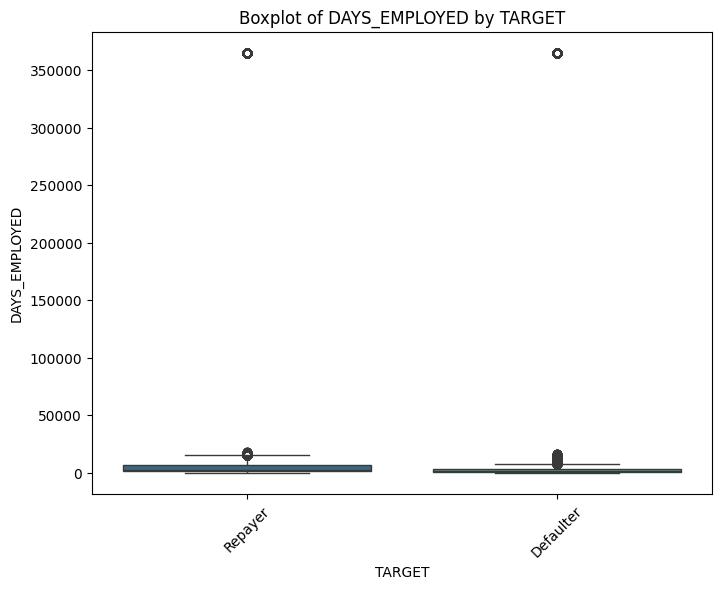

In [40]:
analyze_numerical_vs_categorical(df, "DAYS_EMPLOYED", "TARGET")

Numerical vs. Categorical:CNT_CHILDREN and TARGET


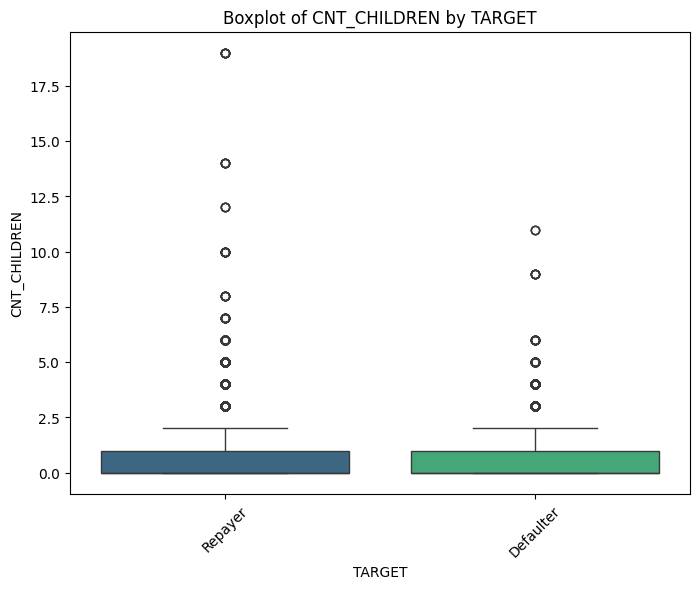

In [41]:
analyze_numerical_vs_categorical(df, "CNT_CHILDREN", "TARGET")

Categorical vs. Categorical:NAME_CONTRACT_TYPE and TARGET


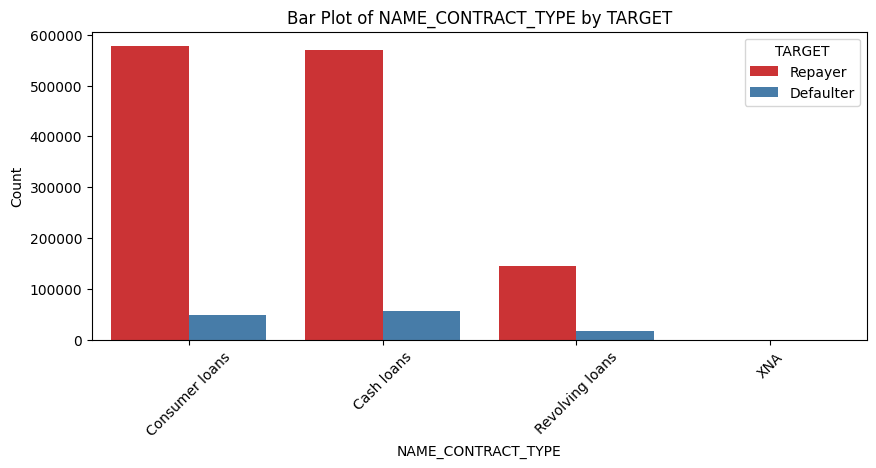

In [42]:
analyze_categorical_vs_categorical(df, "NAME_CONTRACT_TYPE", "TARGET")

Categorical vs. Categorical:NAME_CASH_LOAN_PURPOSE and TARGET


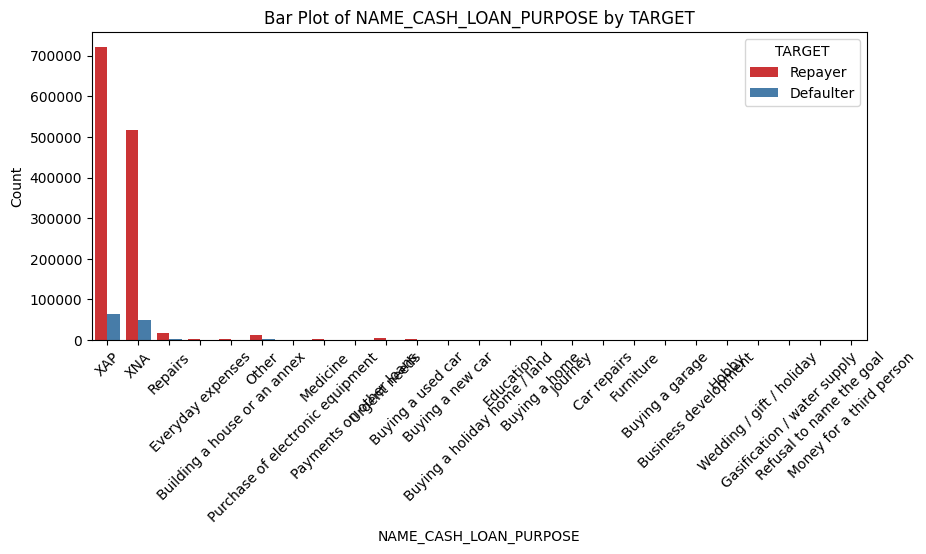

In [43]:
analyze_categorical_vs_categorical(df, "NAME_CASH_LOAN_PURPOSE", "TARGET")

Categorical vs. Categorical:CODE_GENDER and TARGET


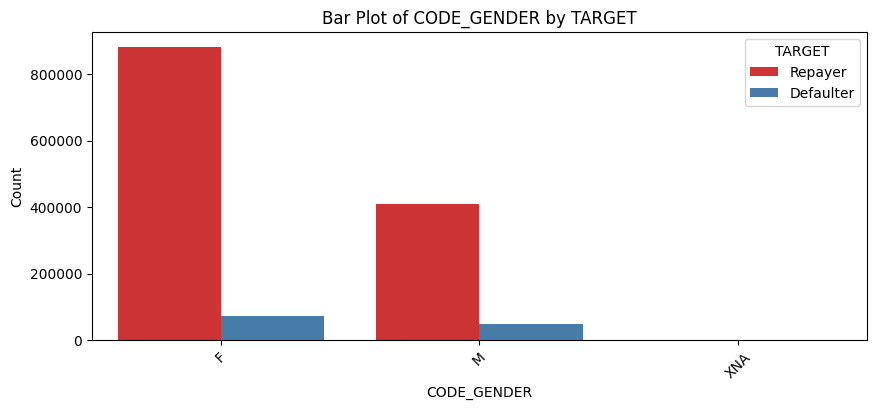

In [44]:
analyze_categorical_vs_categorical(df, "CODE_GENDER", "TARGET")

Categorical vs. Categorical:NAME_INCOME_TYPE and TARGET


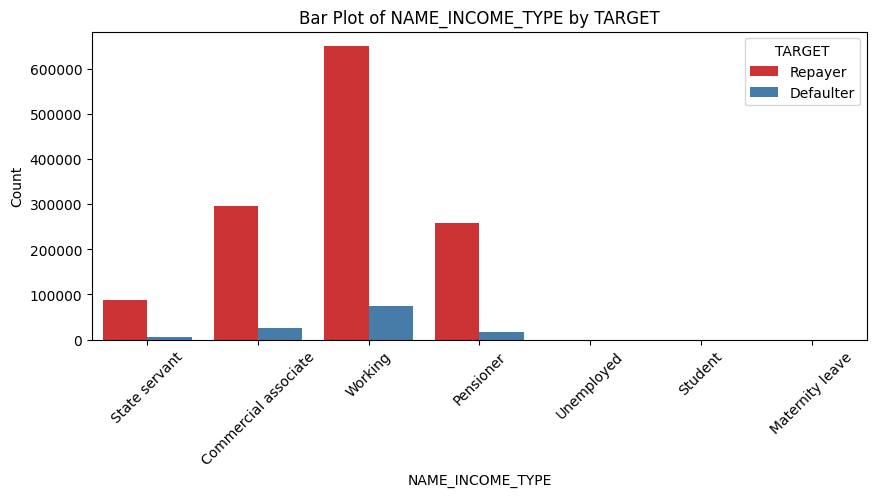

In [45]:
analyze_categorical_vs_categorical(df, "NAME_INCOME_TYPE", "TARGET")

Categorical vs. Categorical:NAME_EDUCATION_TYPE and TARGET


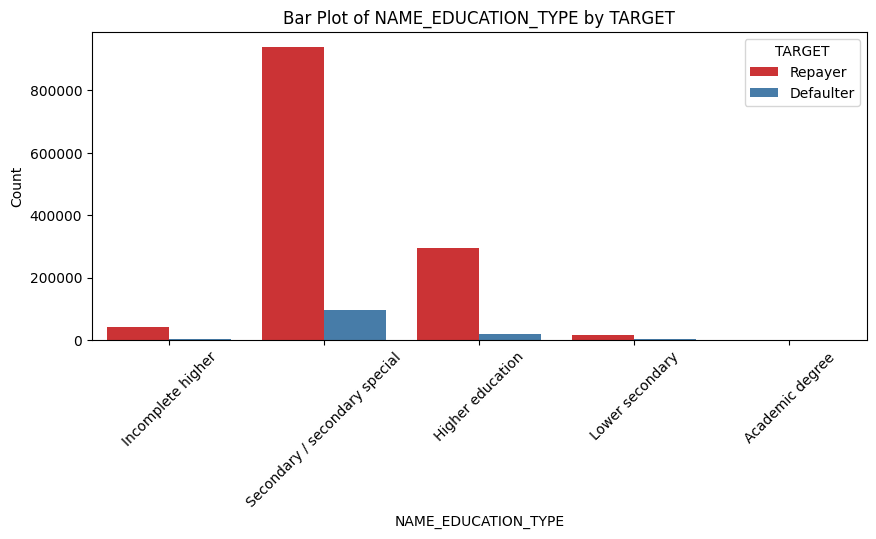

In [46]:
analyze_categorical_vs_categorical(df, "NAME_EDUCATION_TYPE", "TARGET")

Categorical vs. Categorical:NAME_FAMILY_STATUS and TARGET


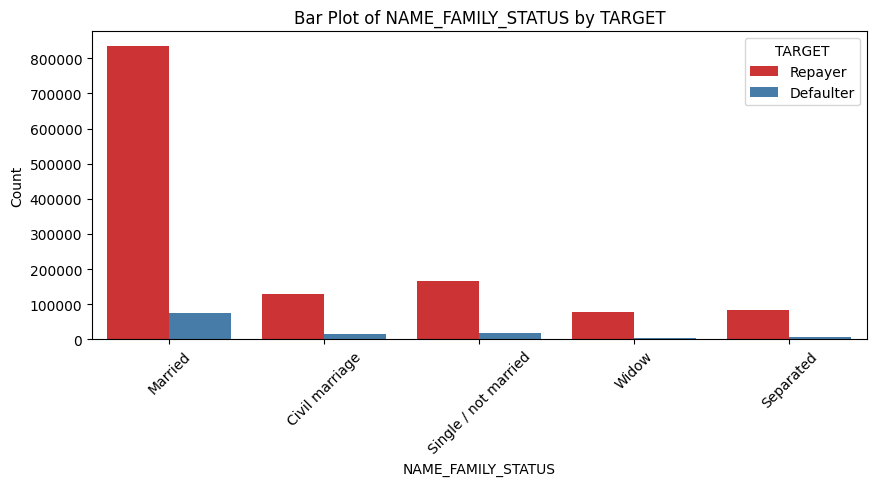

In [47]:
analyze_categorical_vs_categorical(df, "NAME_FAMILY_STATUS", "TARGET")

Categorical vs. Categorical:NAME_HOUSING_TYPE and TARGET


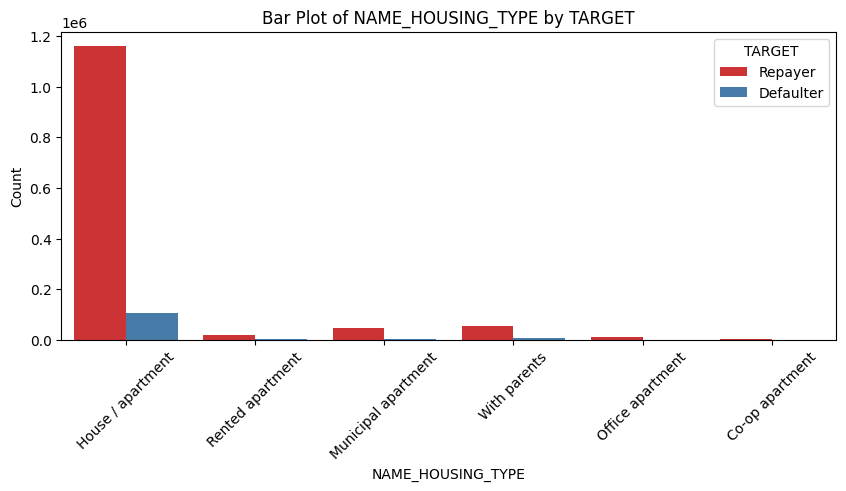

In [48]:
analyze_categorical_vs_categorical(df, "NAME_HOUSING_TYPE", "TARGET")

Categorical vs. Categorical:NAME_CLIENT_TYPE and TARGET


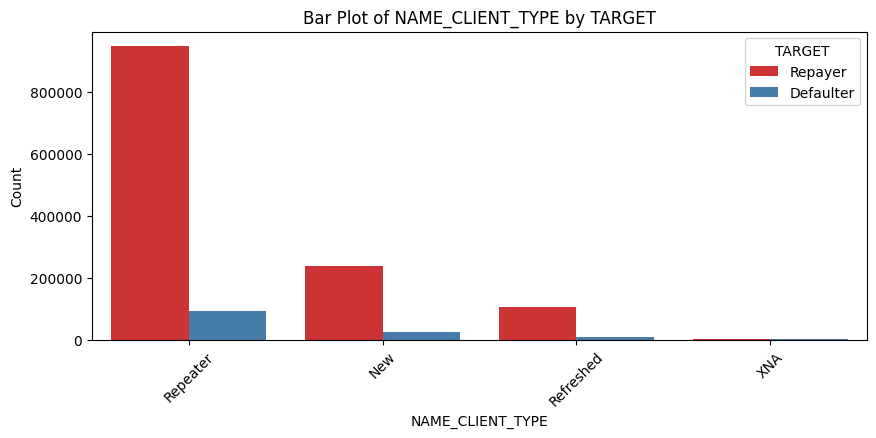

In [49]:
analyze_categorical_vs_categorical(df, "NAME_CLIENT_TYPE", "TARGET")

Categorical vs. Categorical:OCCUPATION_TYPE and TARGET


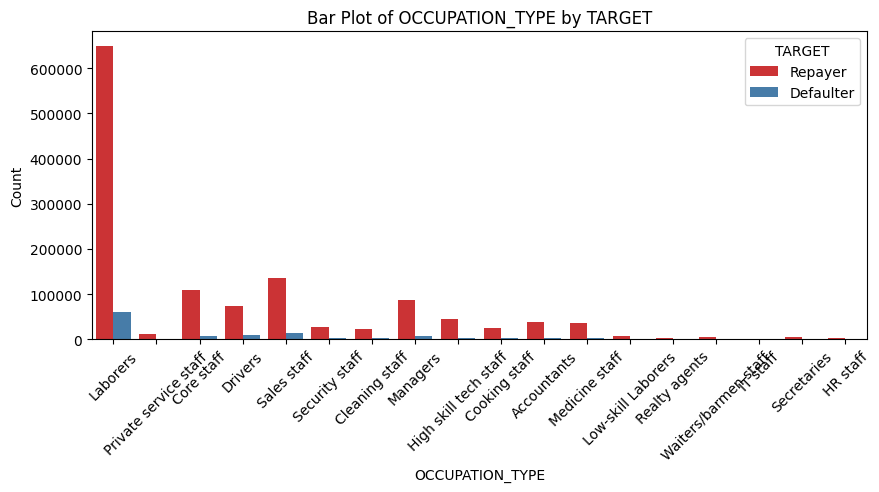

In [50]:
analyze_categorical_vs_categorical(df, "OCCUPATION_TYPE", "TARGET")

Categorical vs. Categorical:CHANNEL_TYPE and TARGET


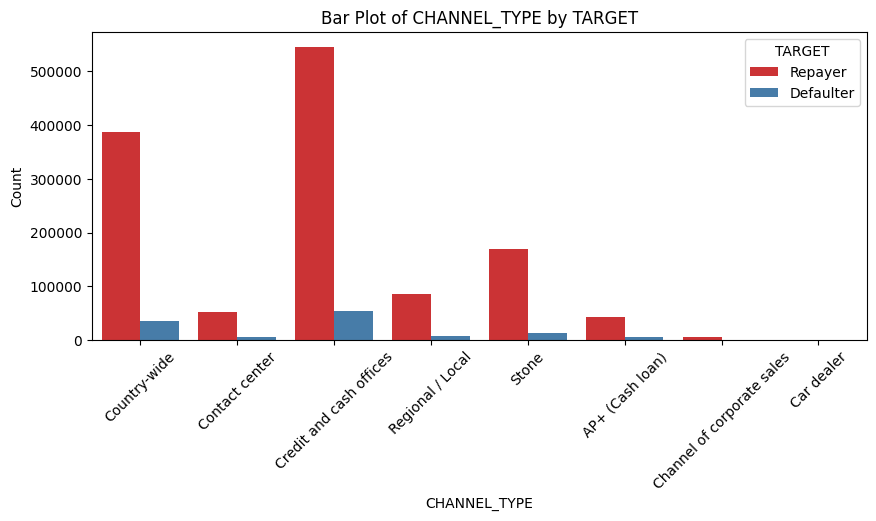

In [51]:
analyze_categorical_vs_categorical(df, "CHANNEL_TYPE", "TARGET")